In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys, os
from matplotlib.pylab import rcParams

In [2]:
#Read file
df_res = pd.read_csv("data/hoja_res.csv", low_memory=False)
df_res_2019 = pd.read_csv("data/hoja_res-2019.csv", low_memory=False)
df_eti = pd.read_csv("data/hoja_etiquetas.csv", low_memory=False)
df_sit = pd.read_csv("data/hoja_sitios.csv", low_memory=False)

# Graphs

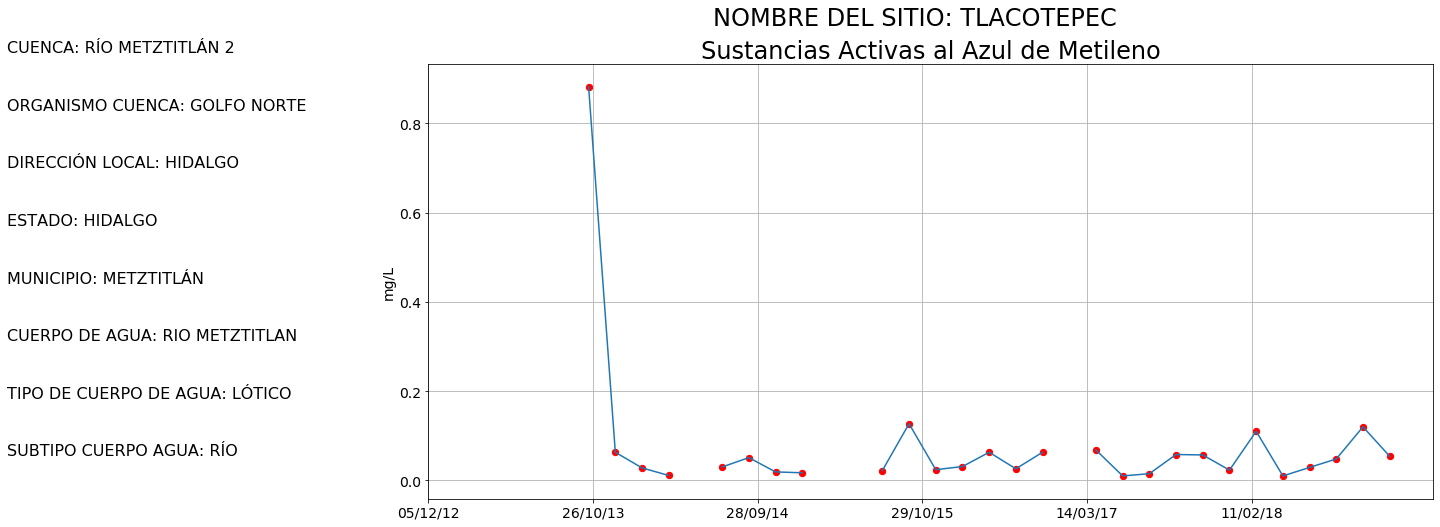

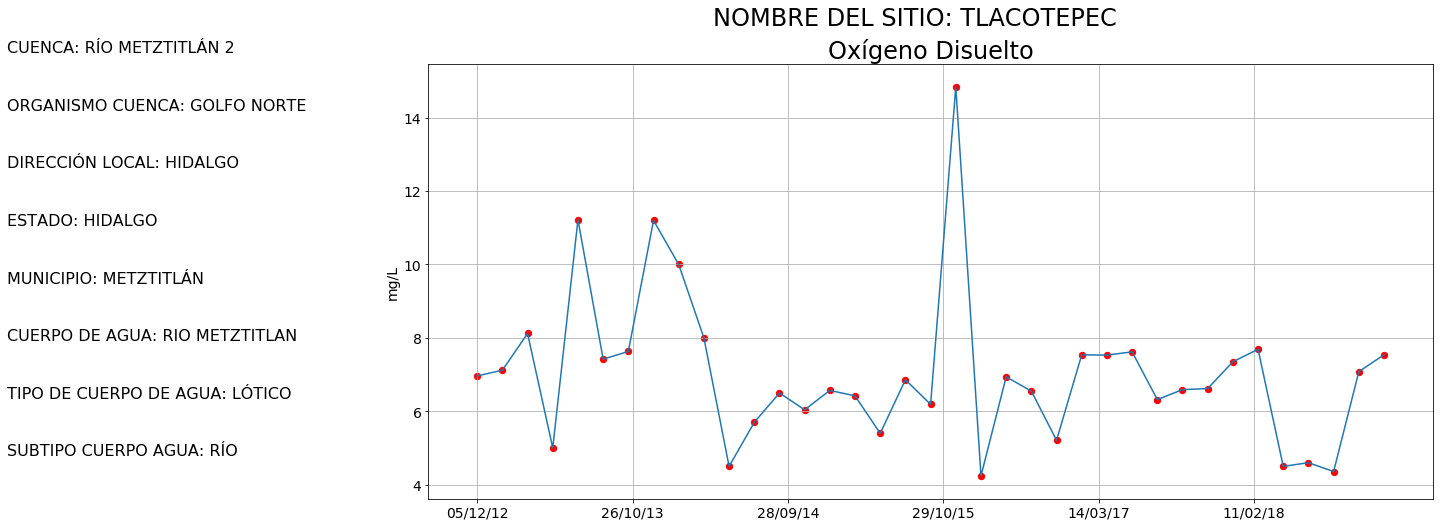

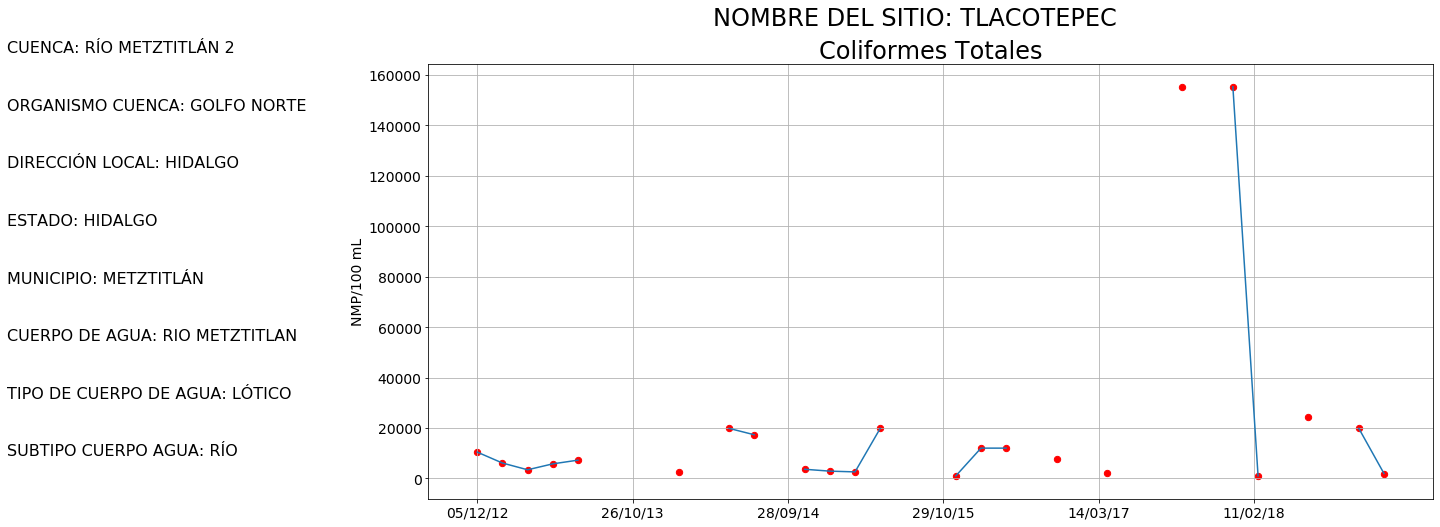

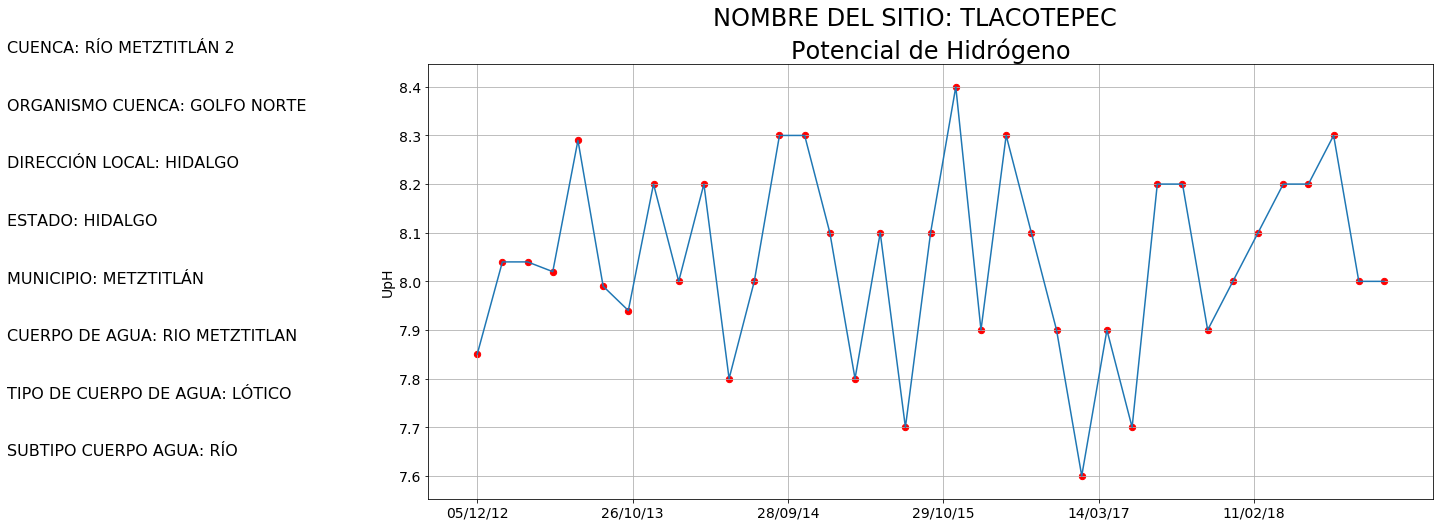

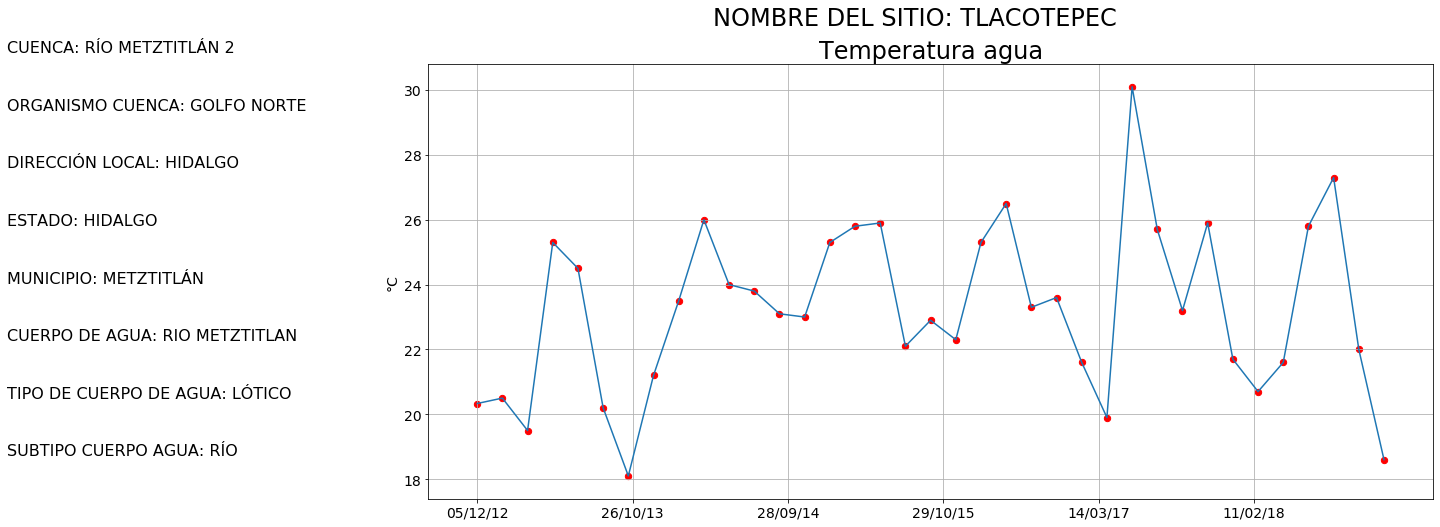

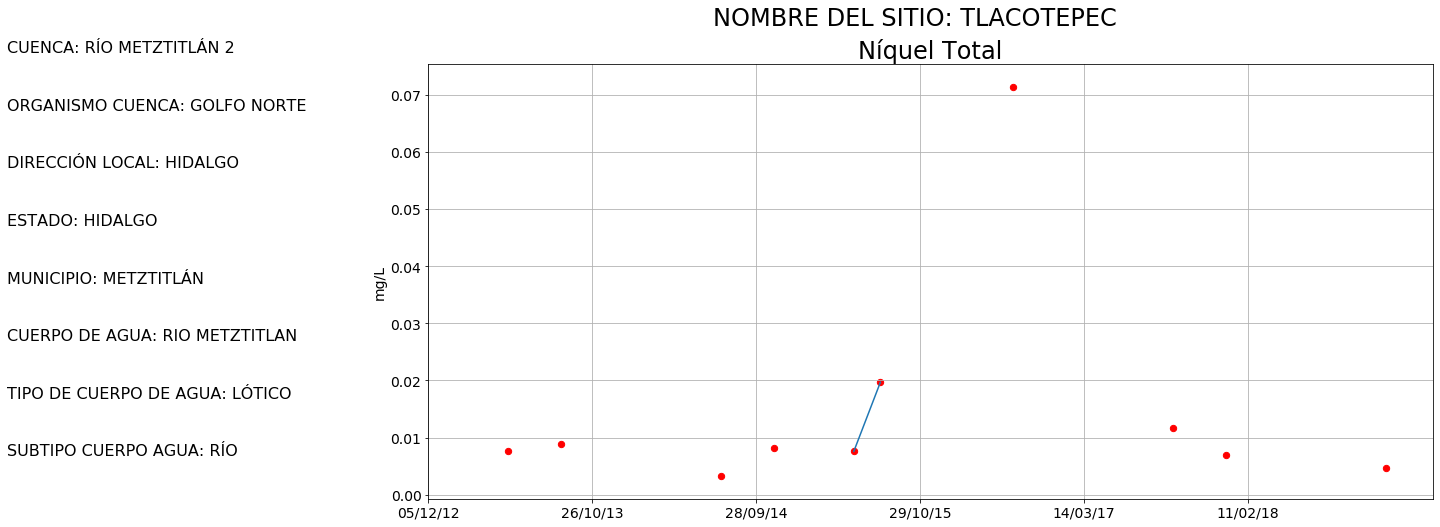

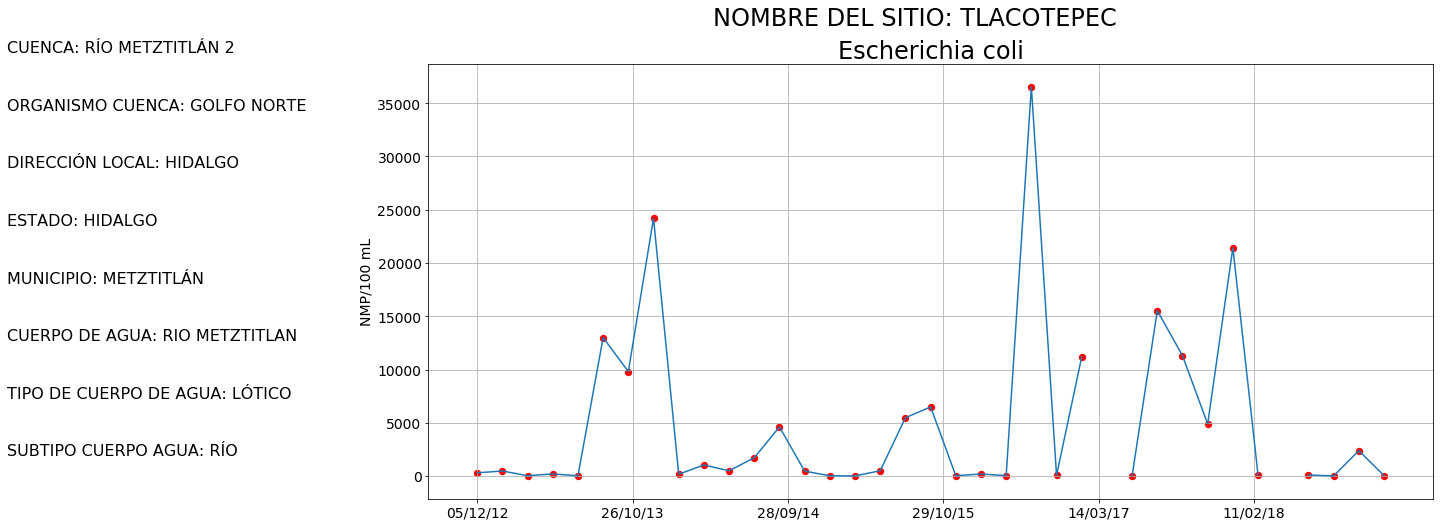

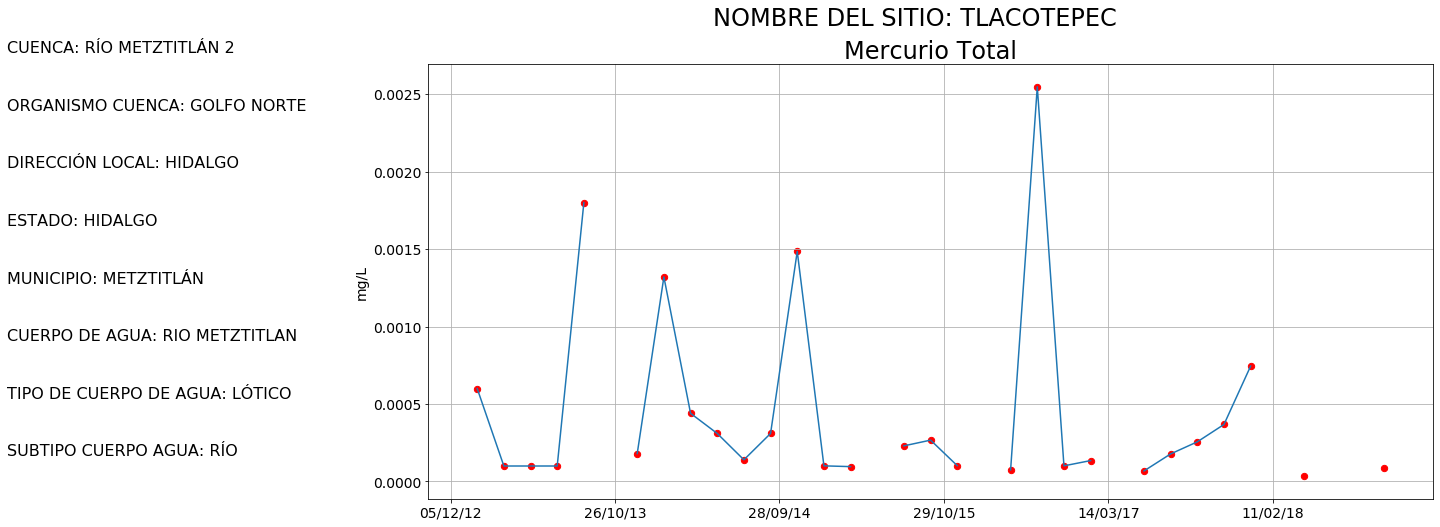

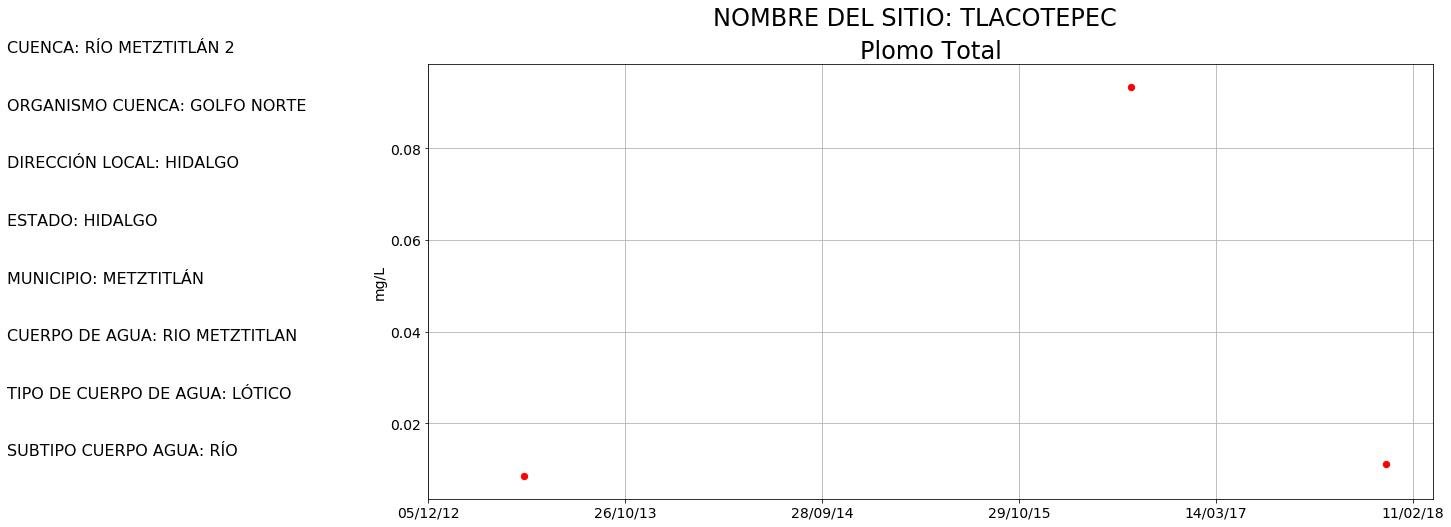

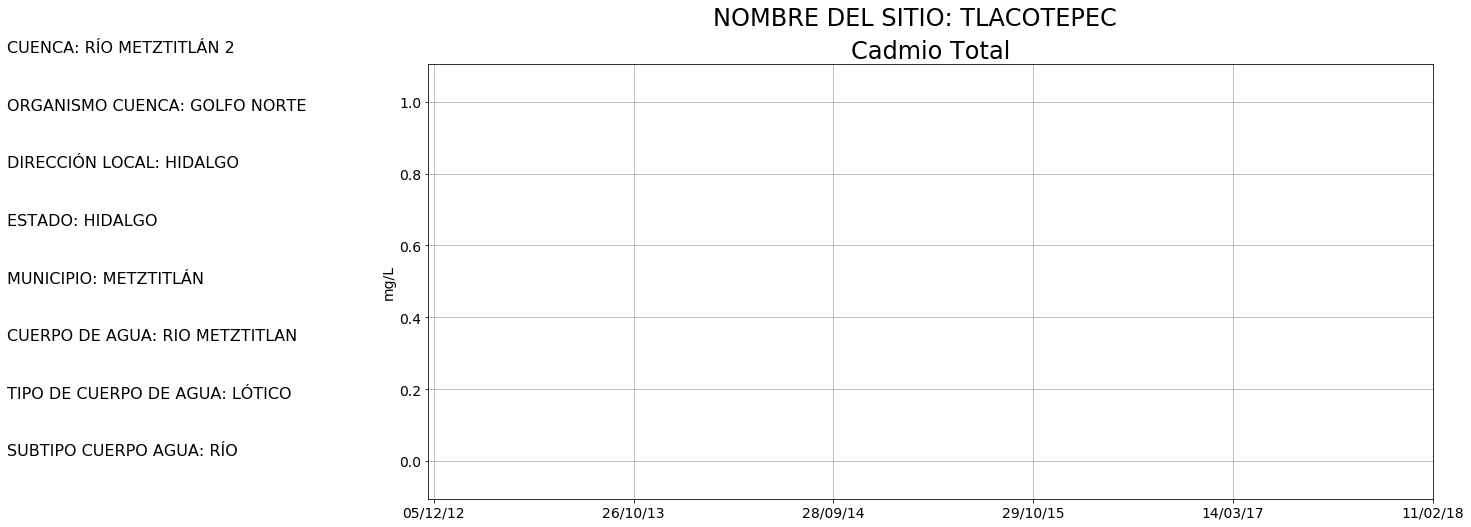

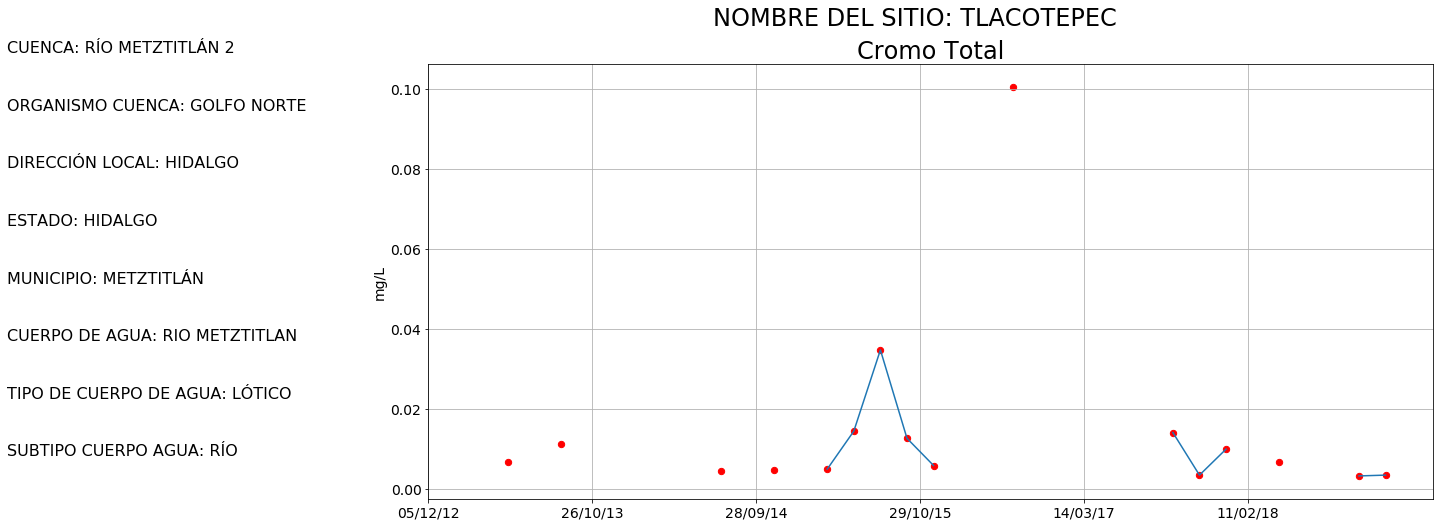

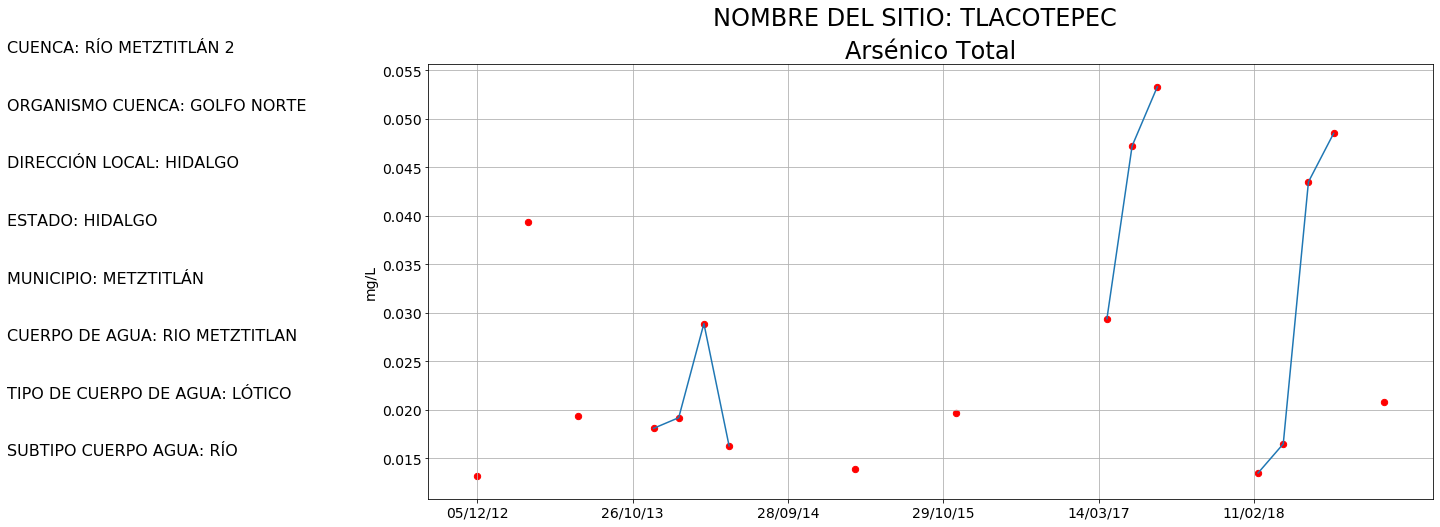

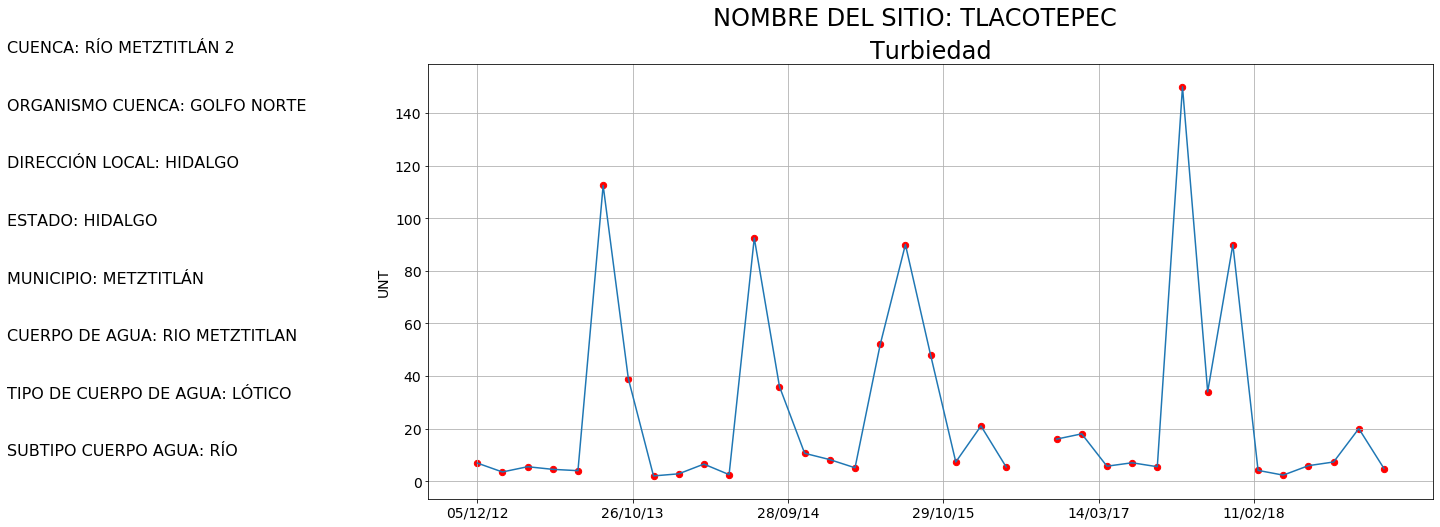

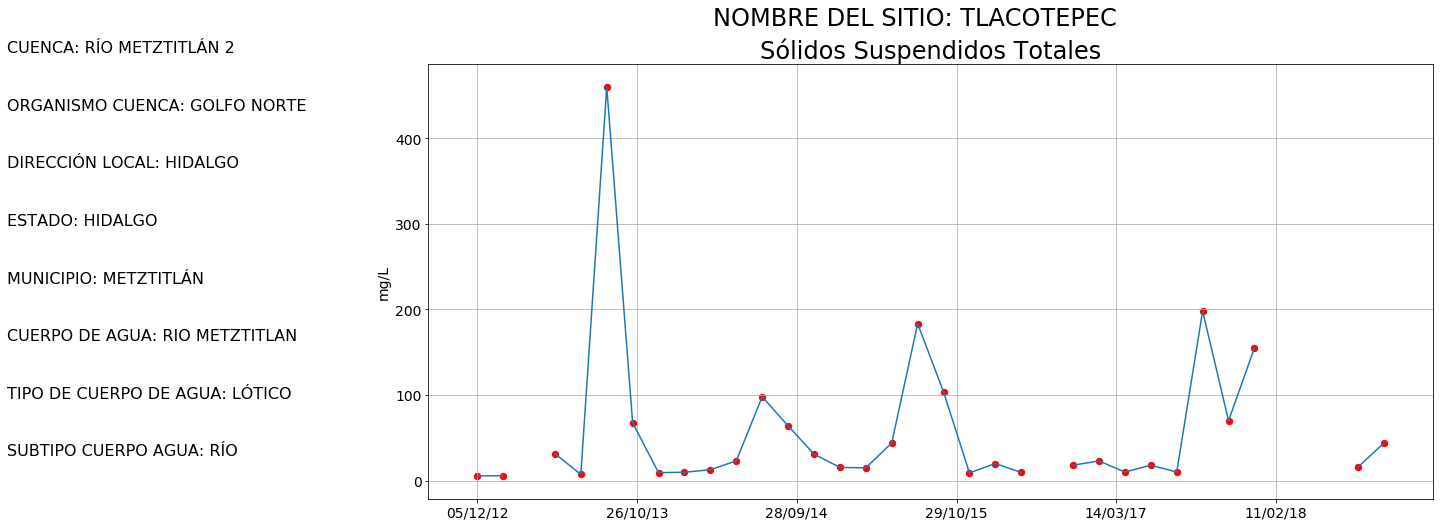

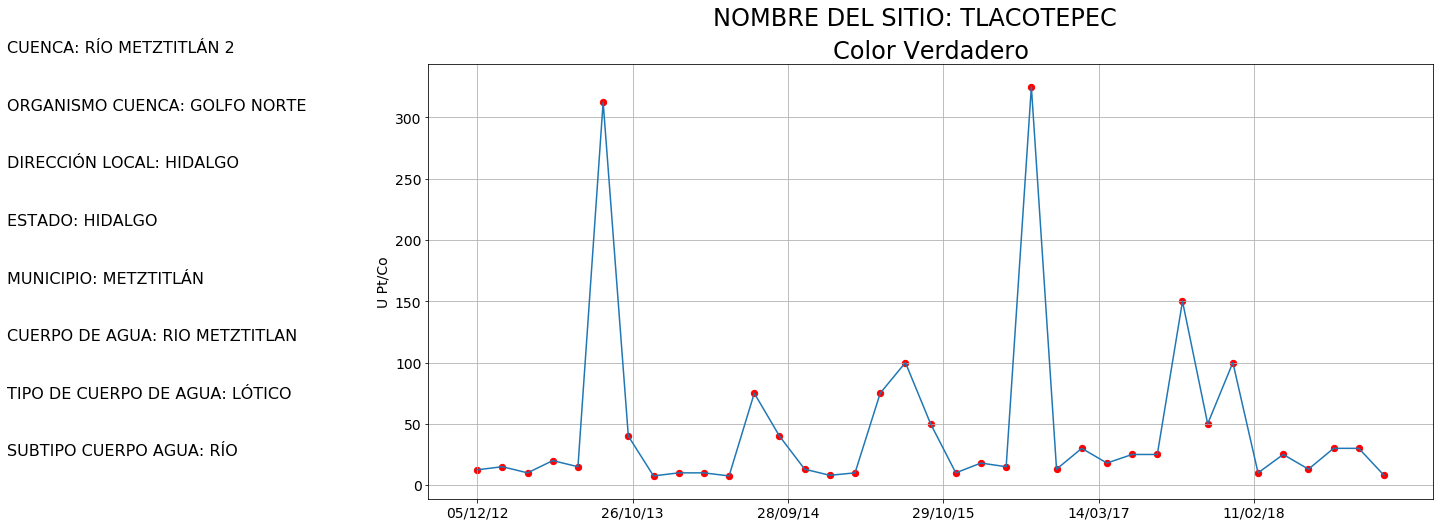

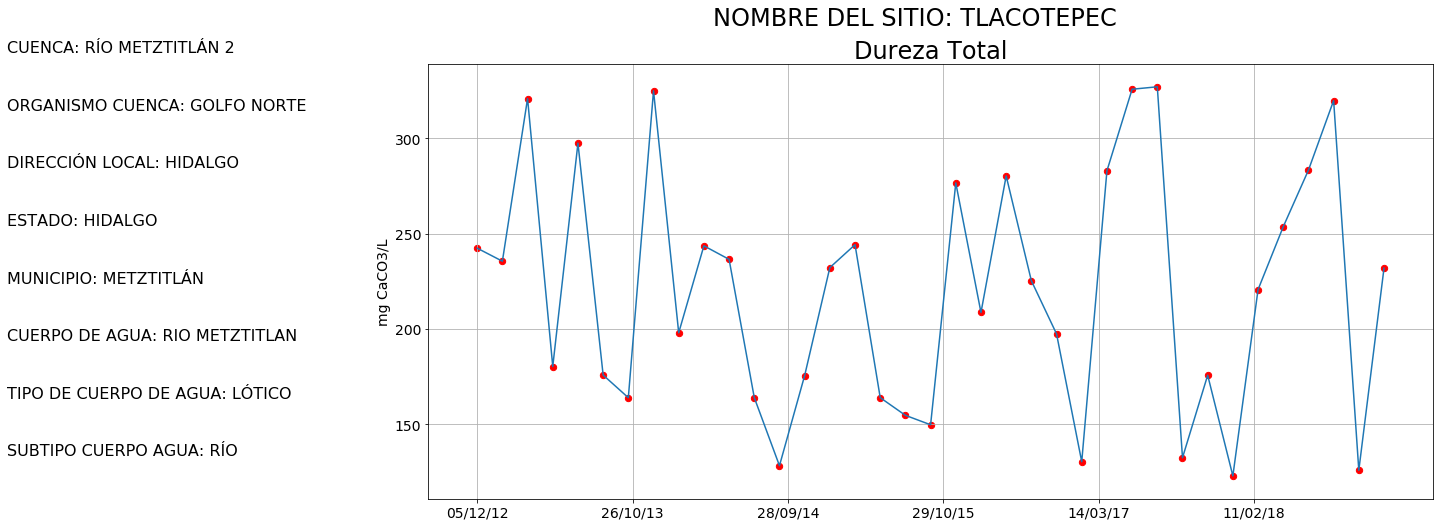

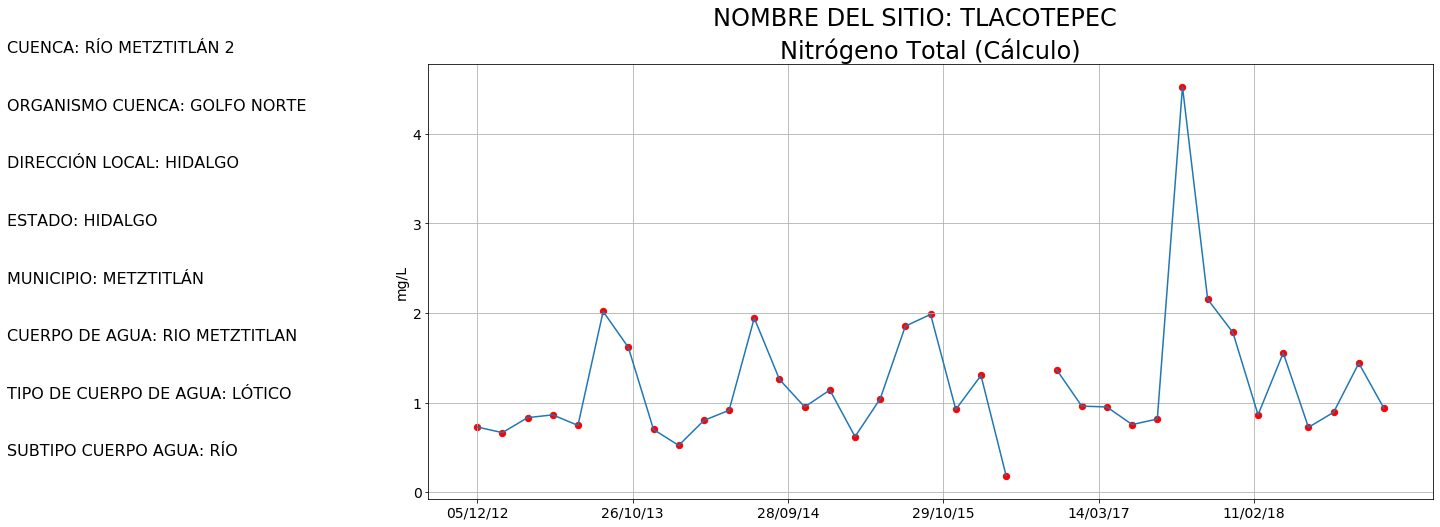

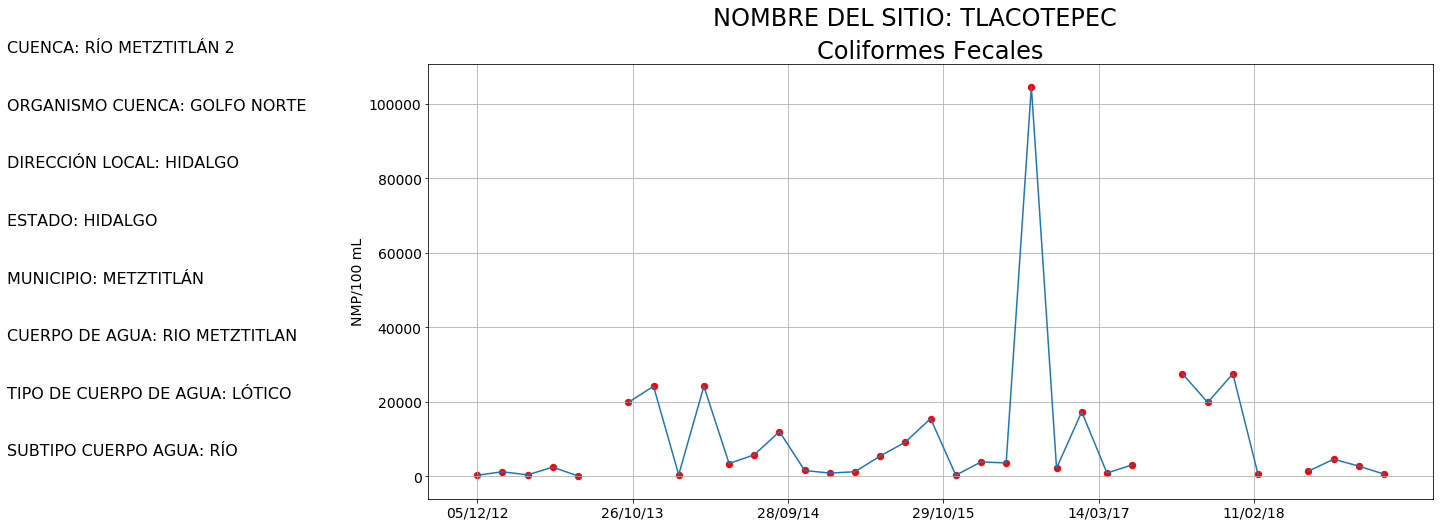

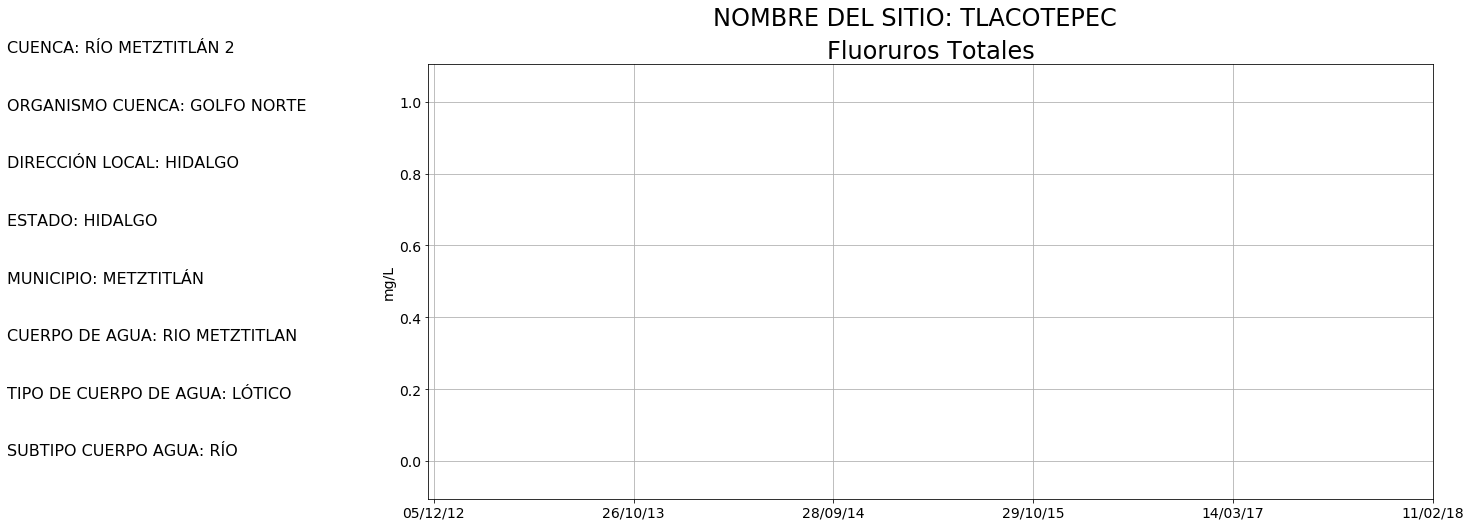

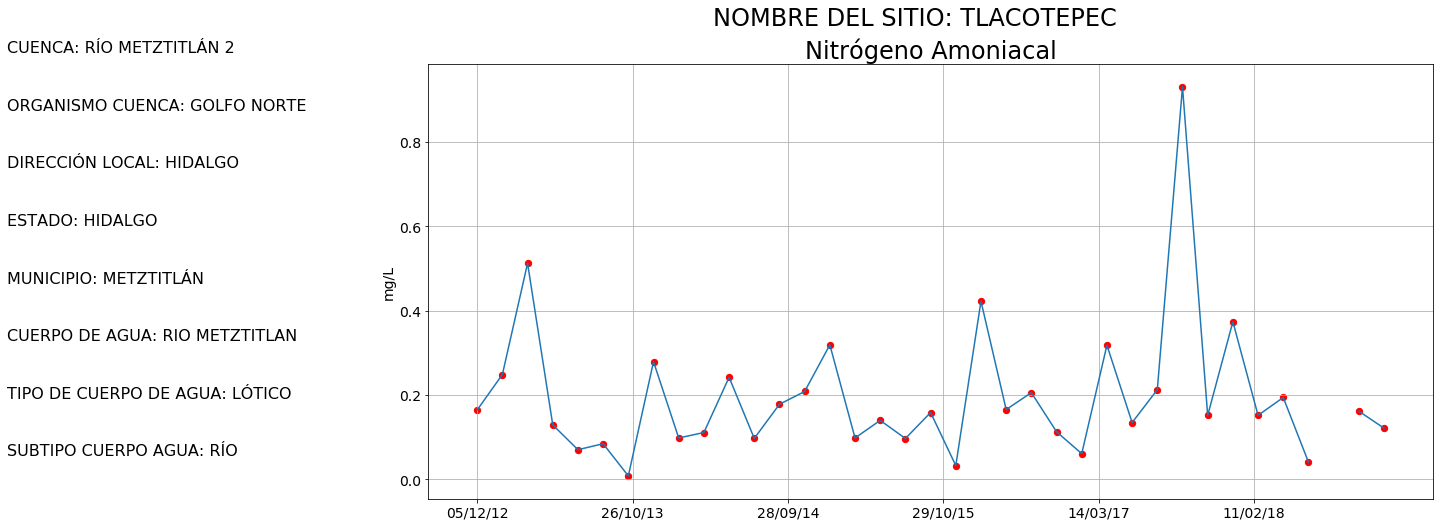

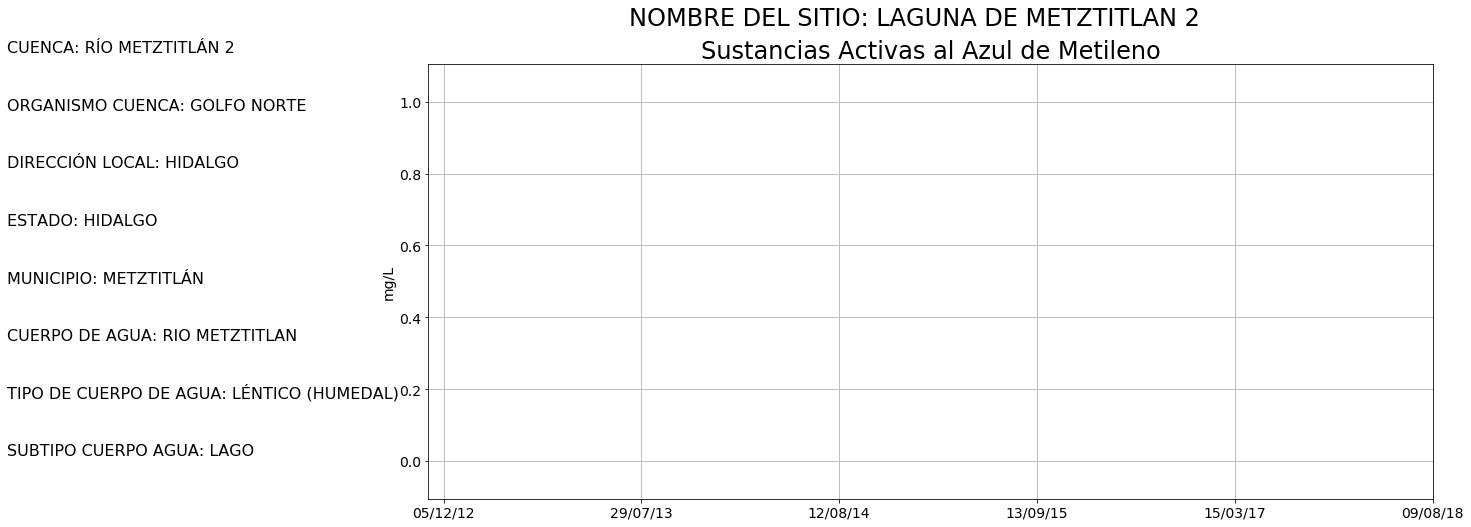

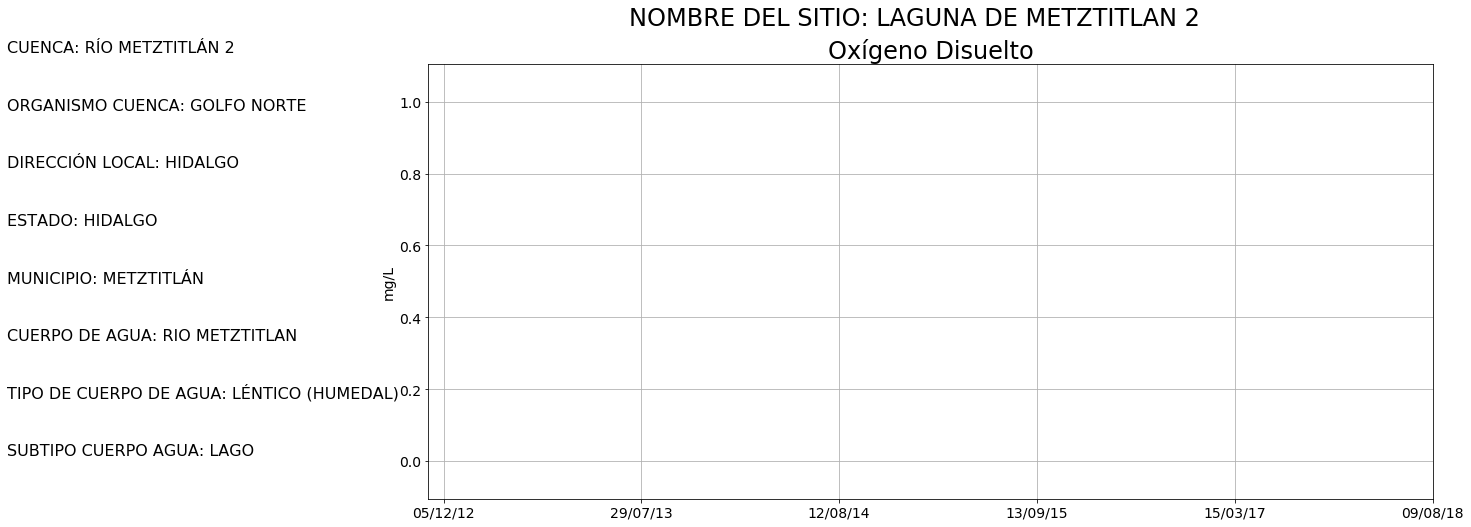

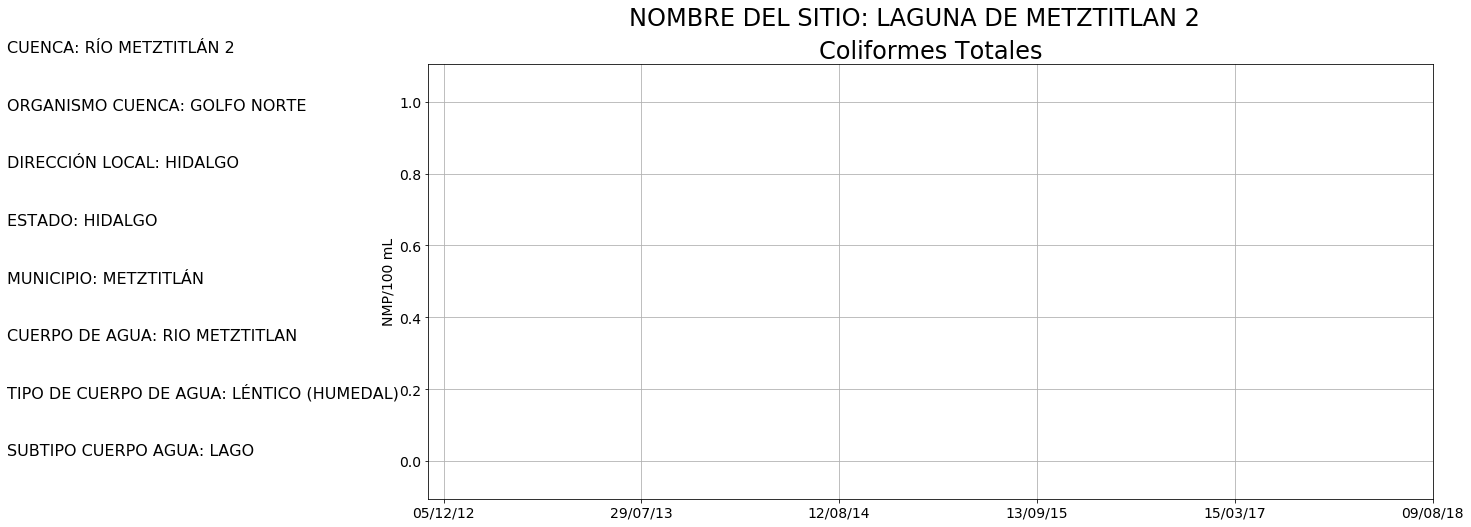

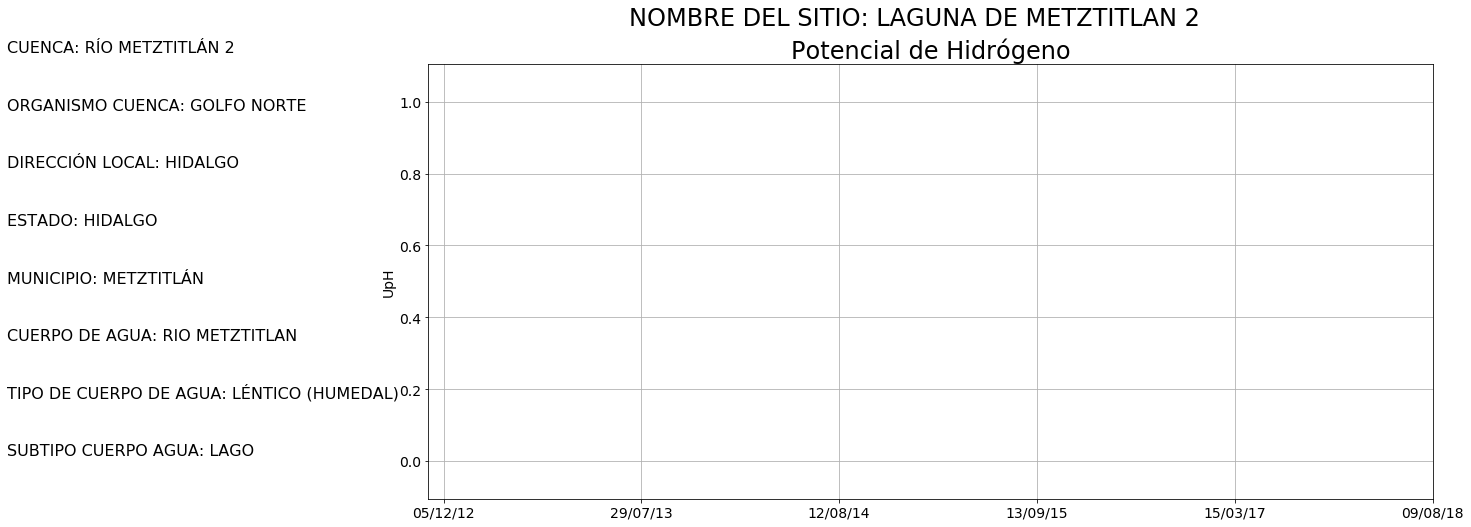

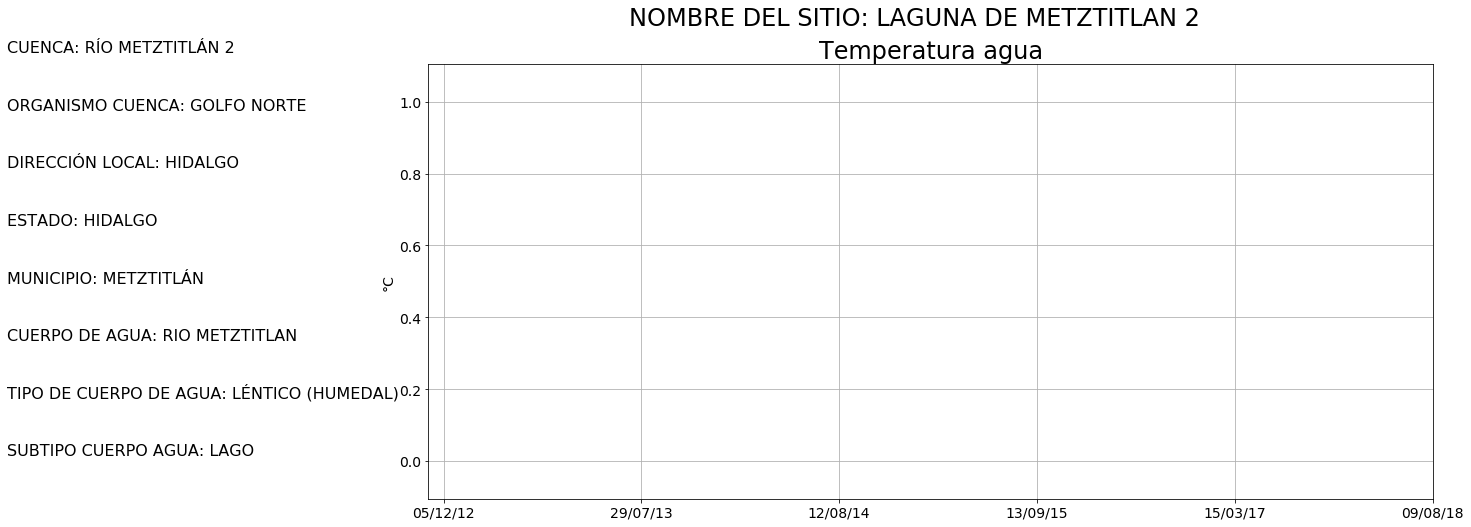

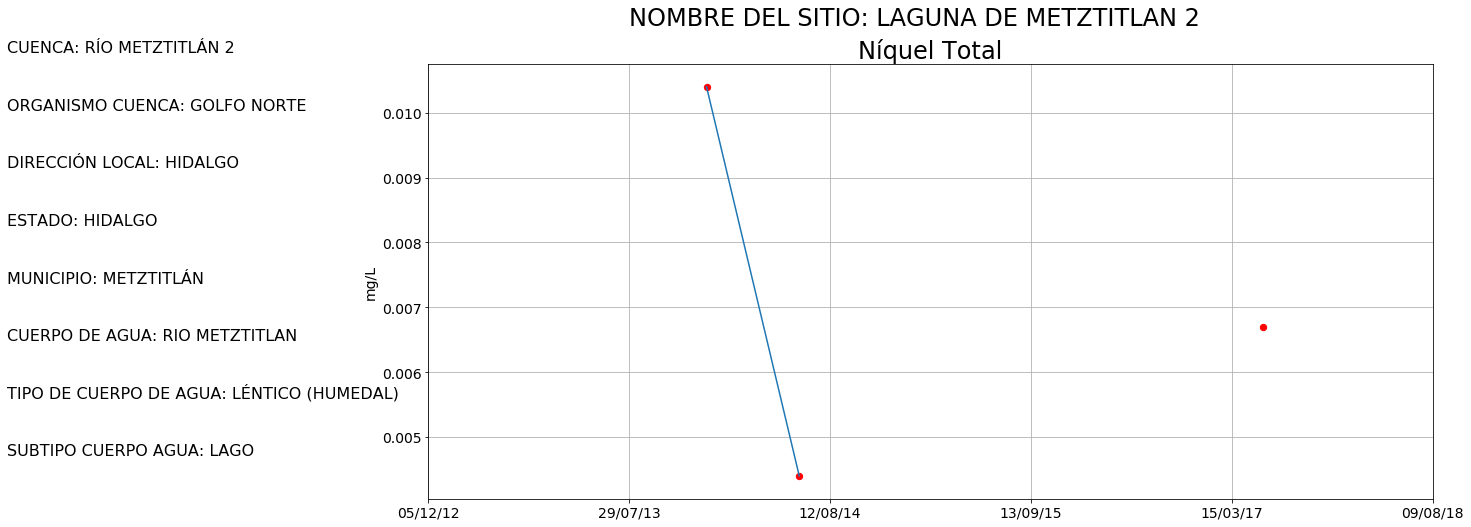

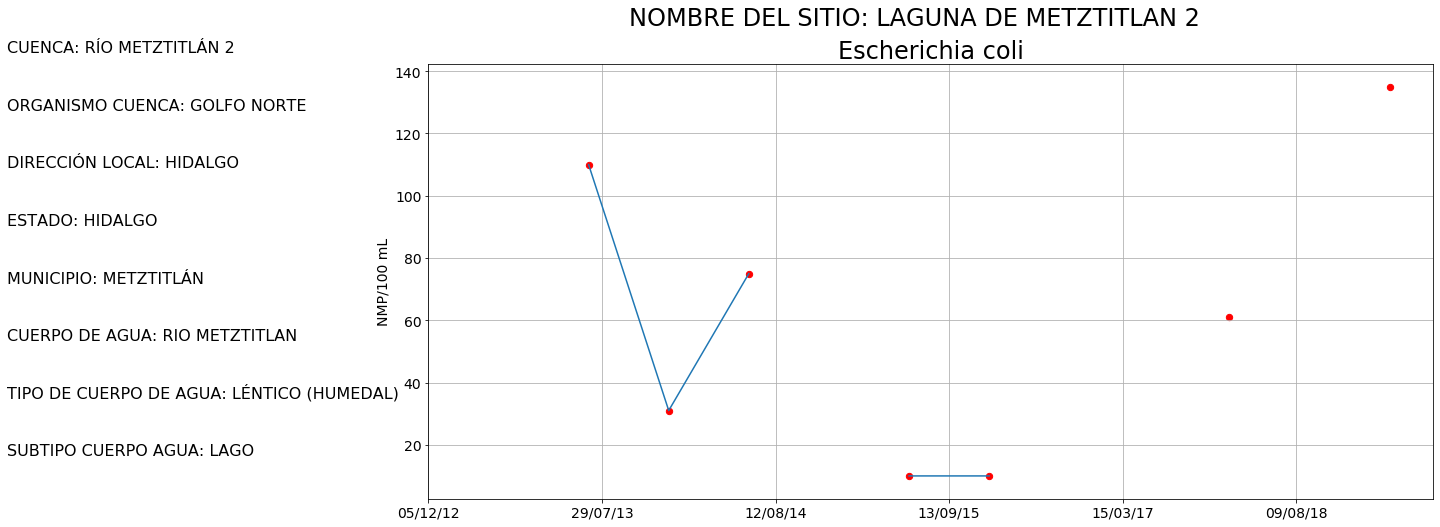

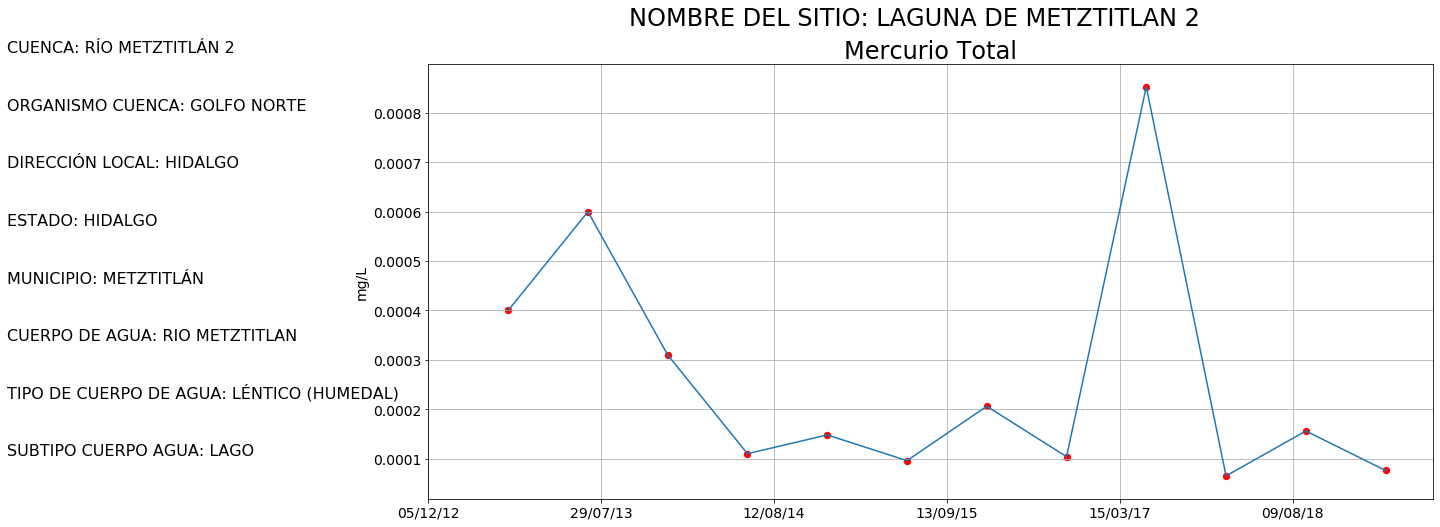

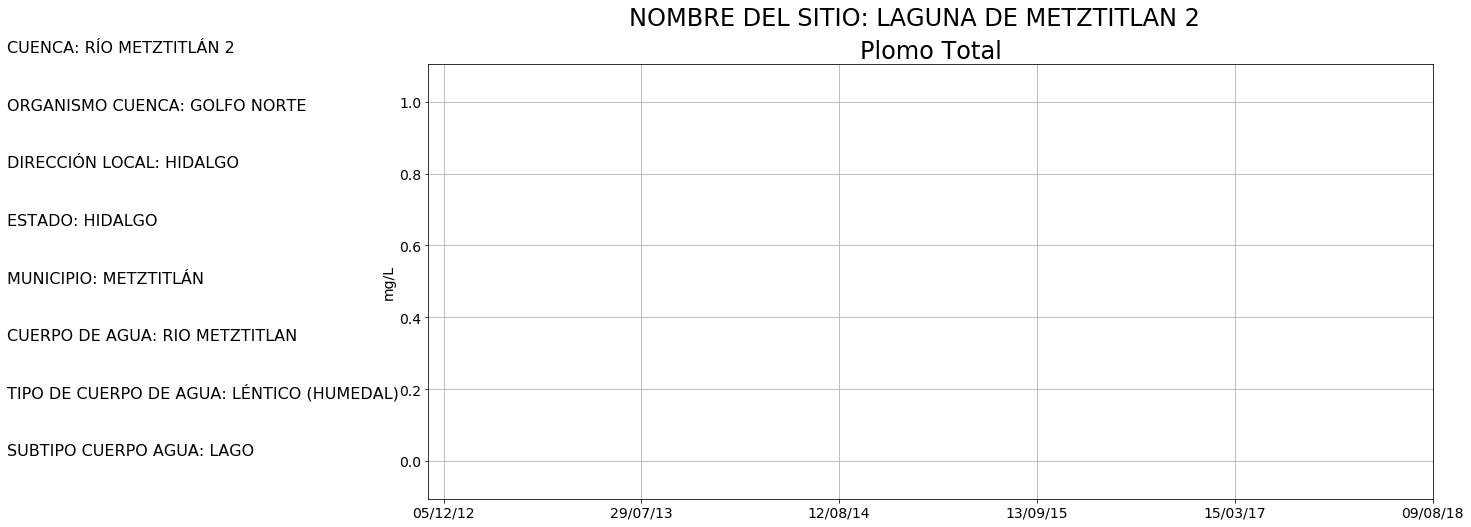

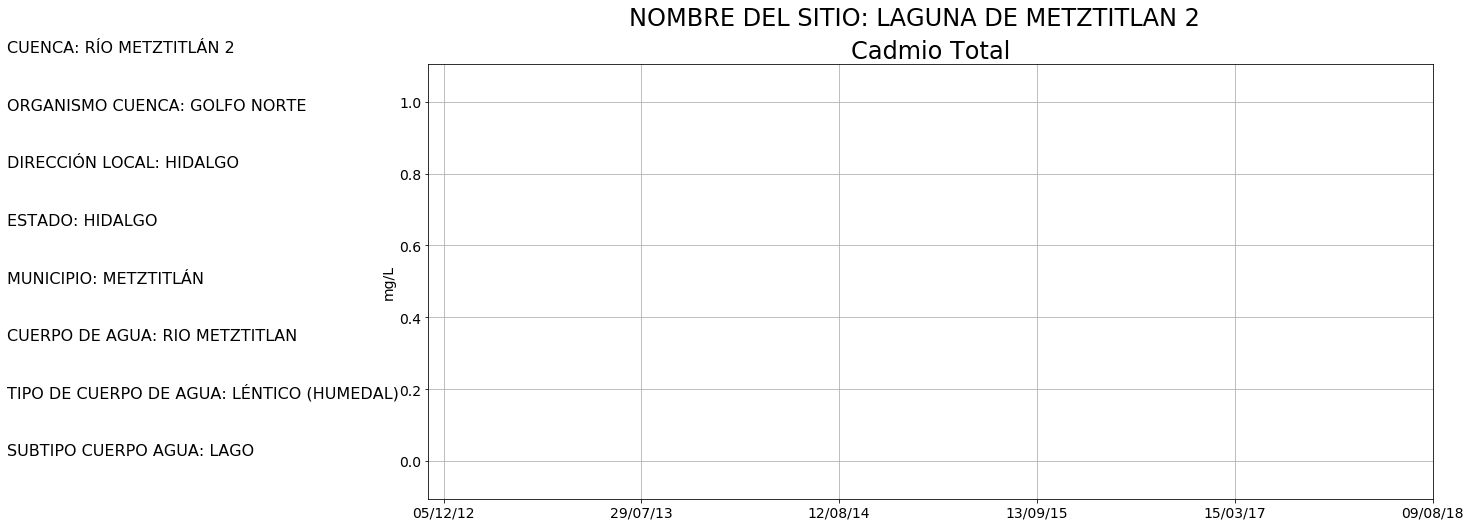

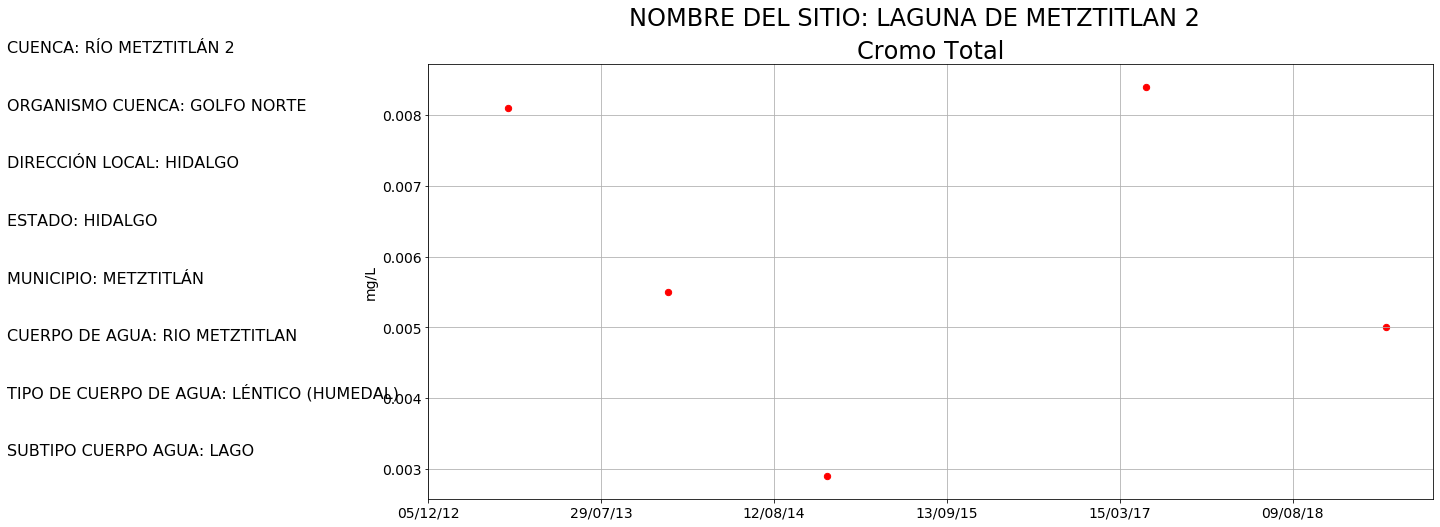

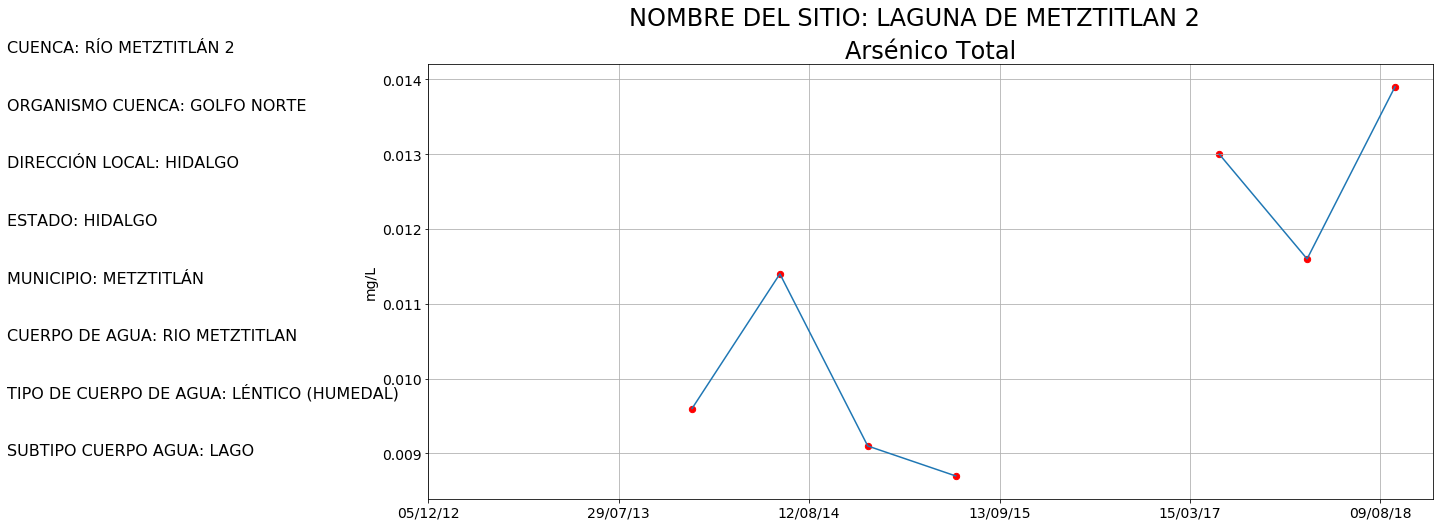

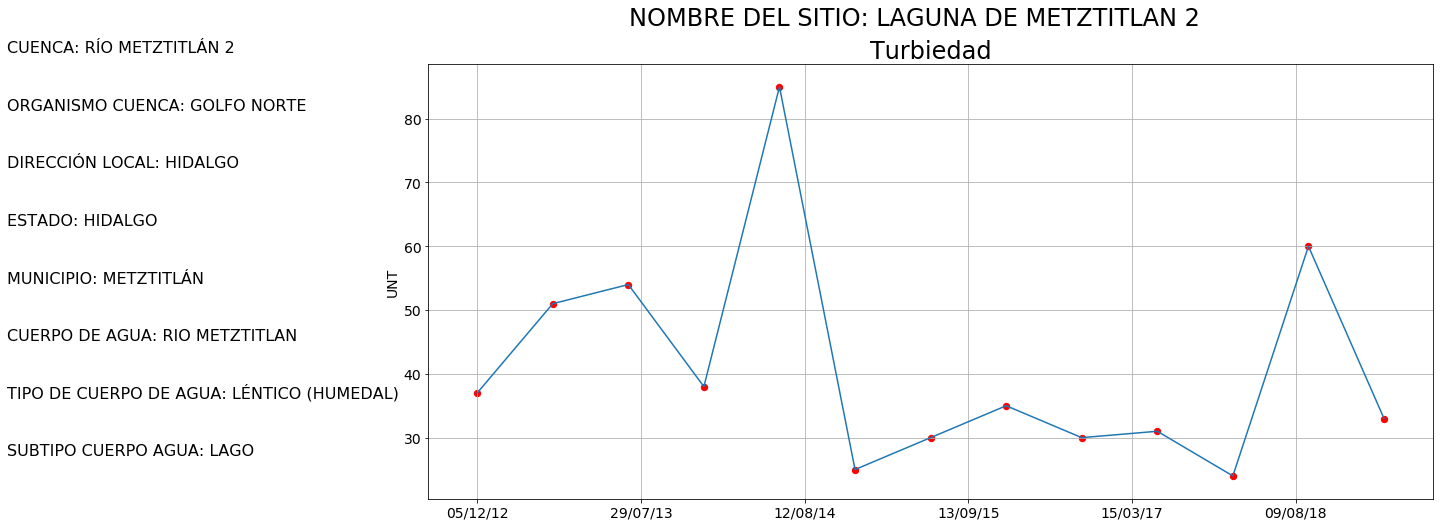

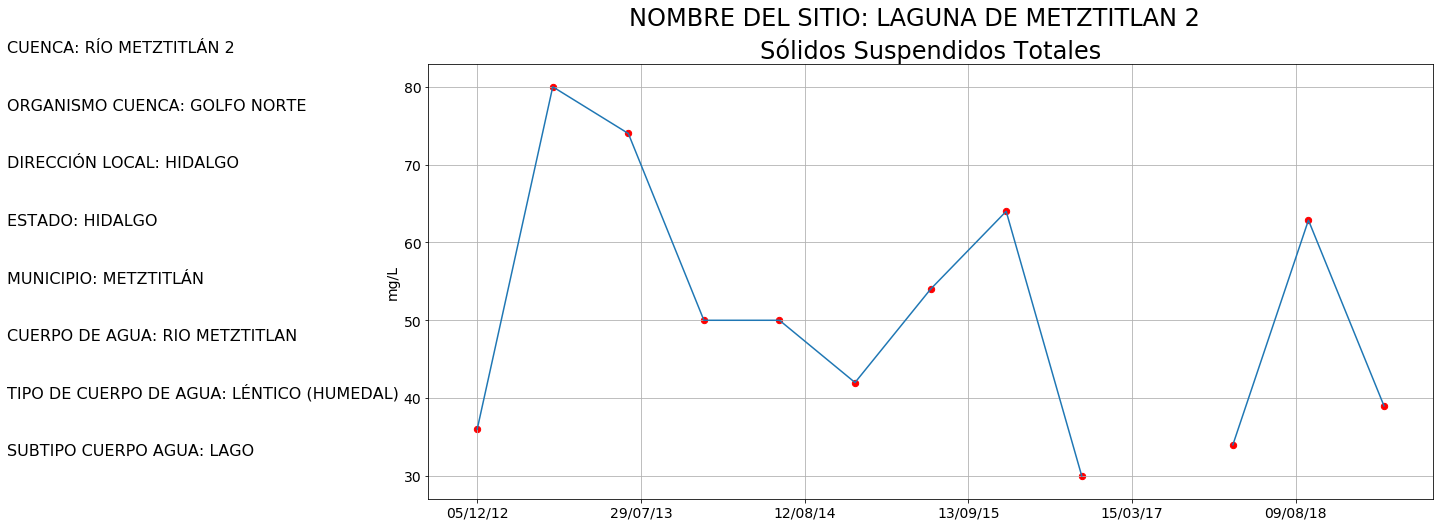

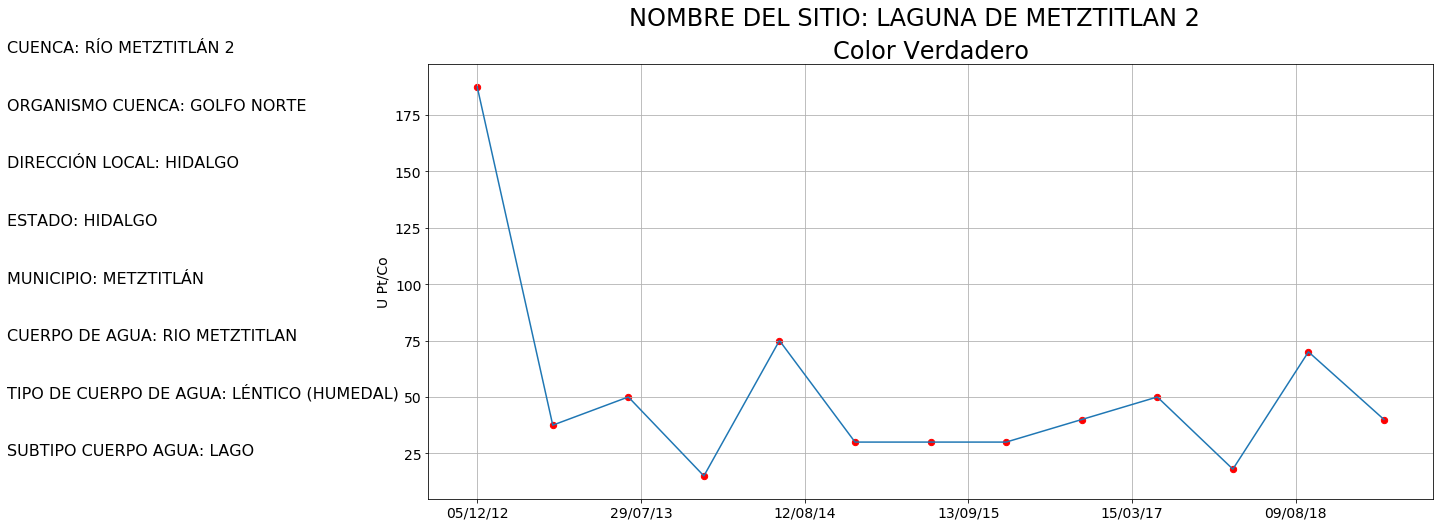

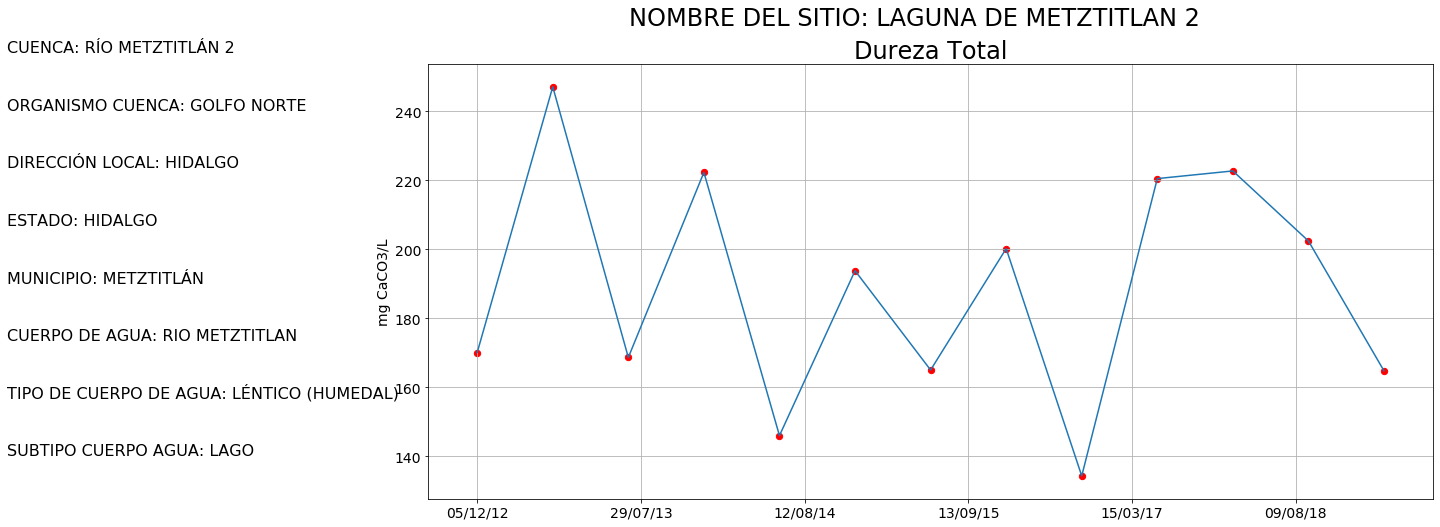

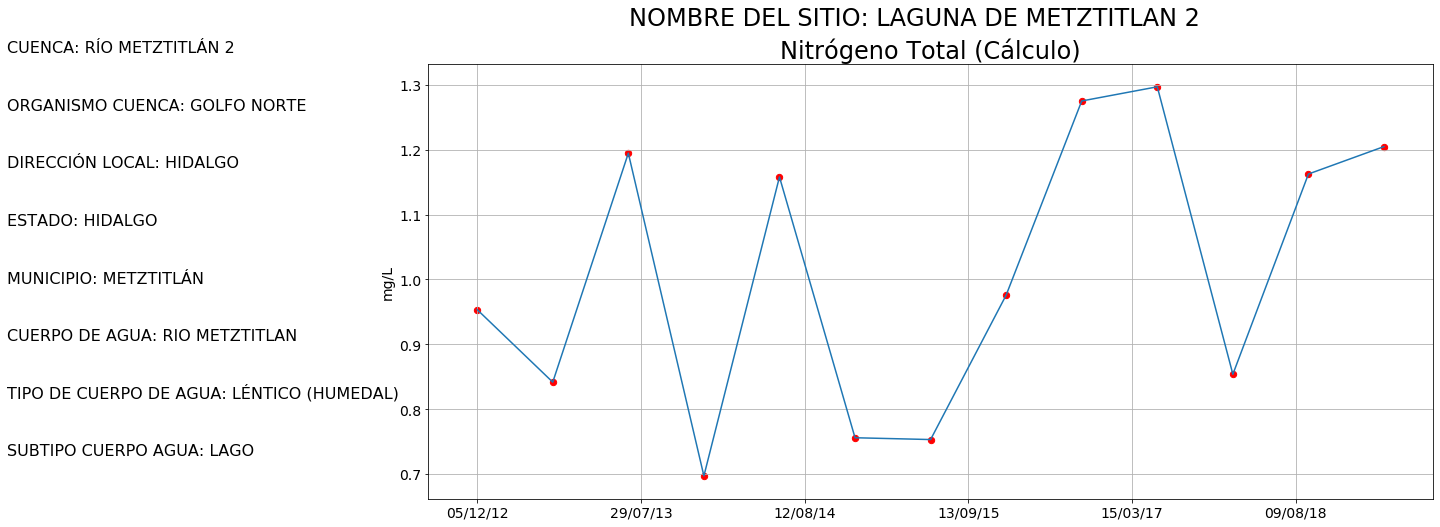

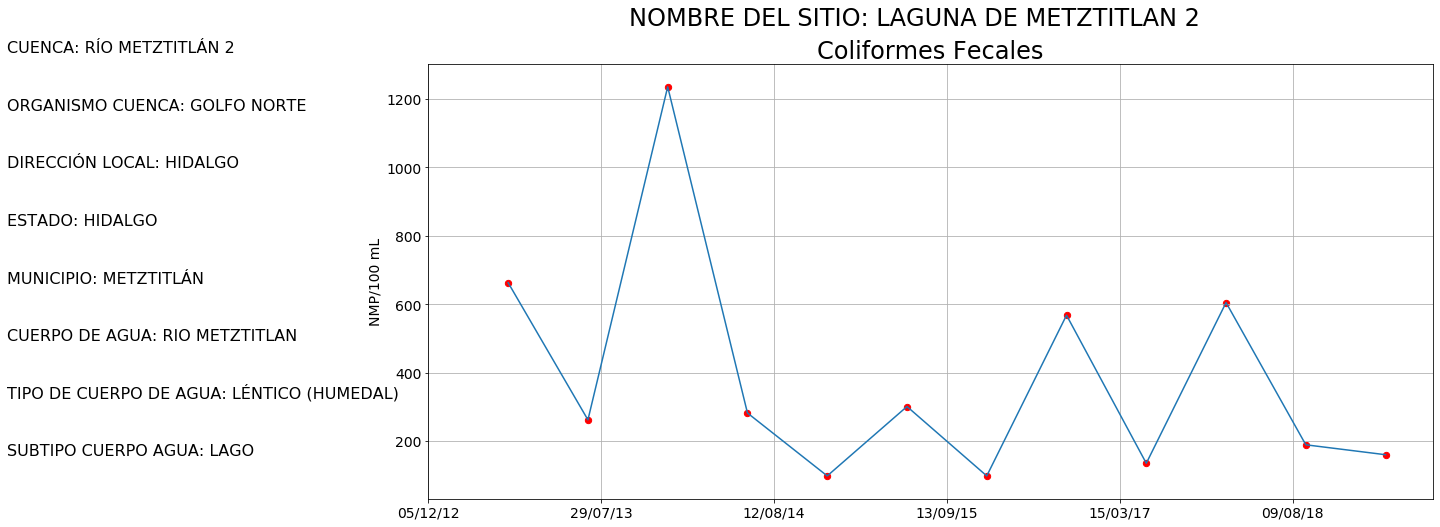

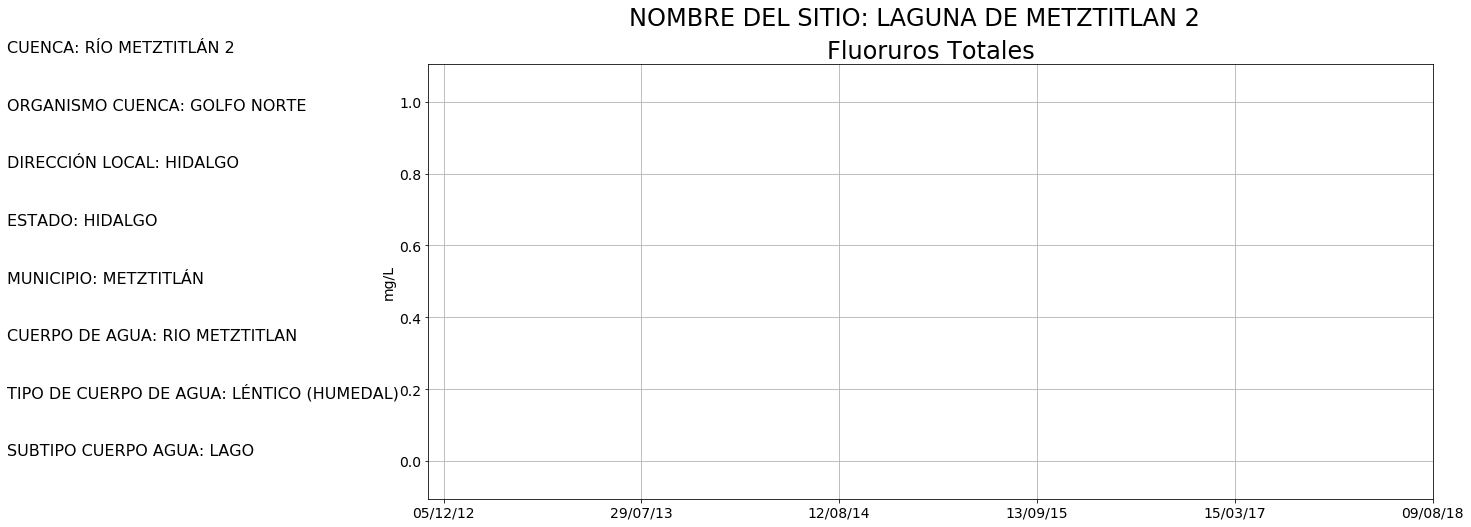

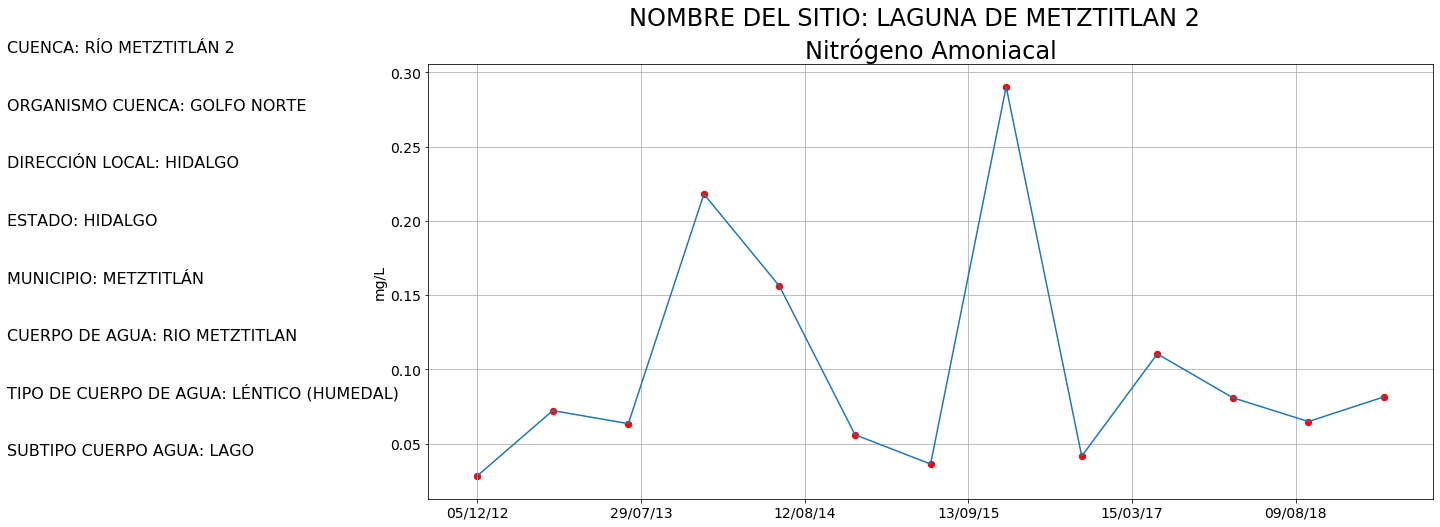

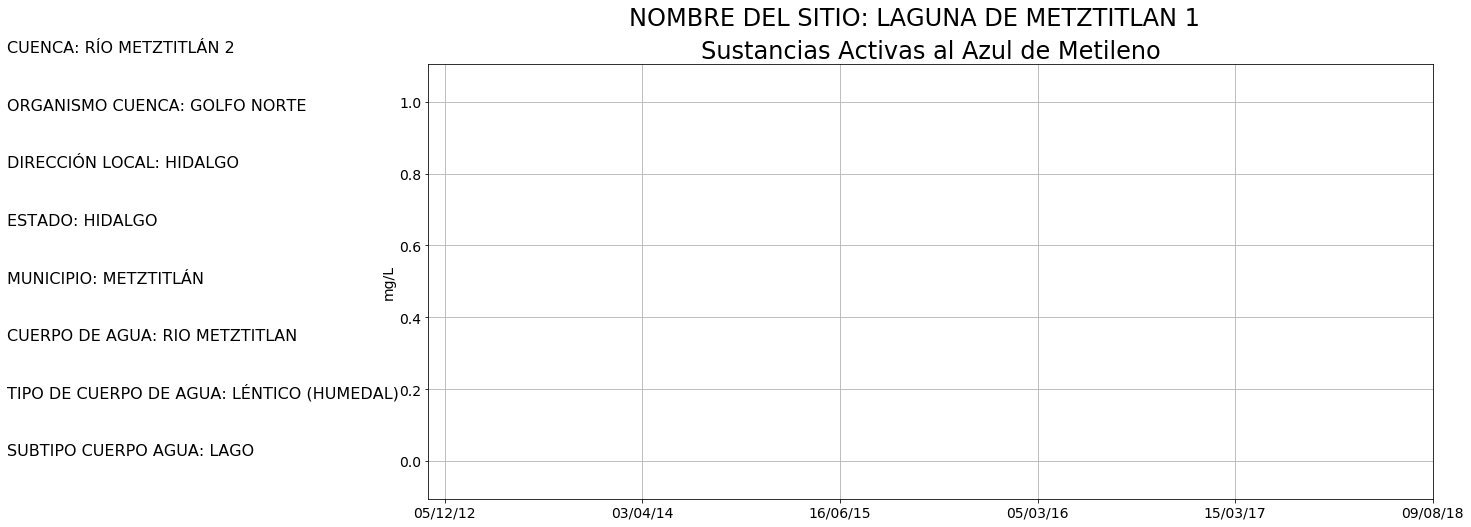

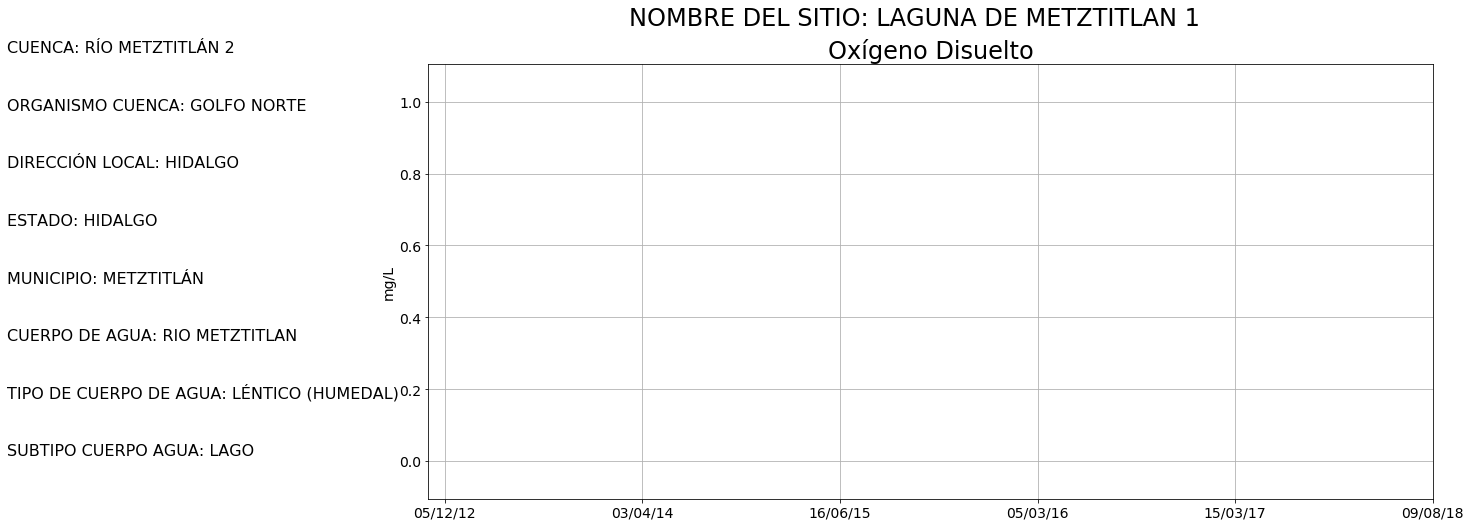

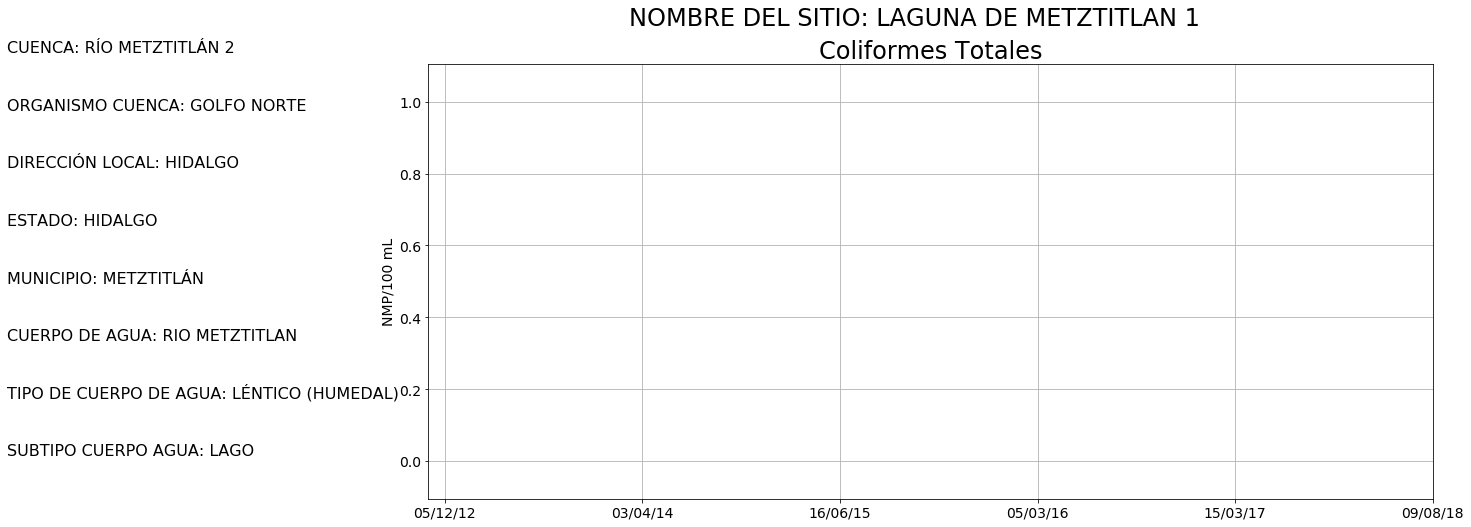

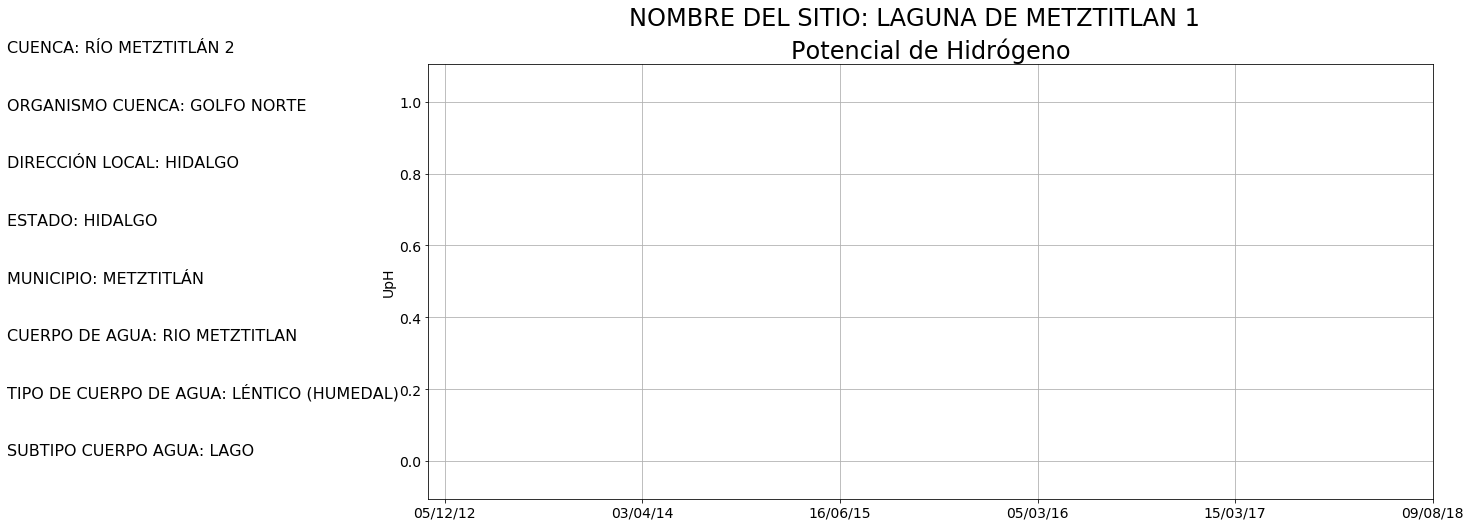

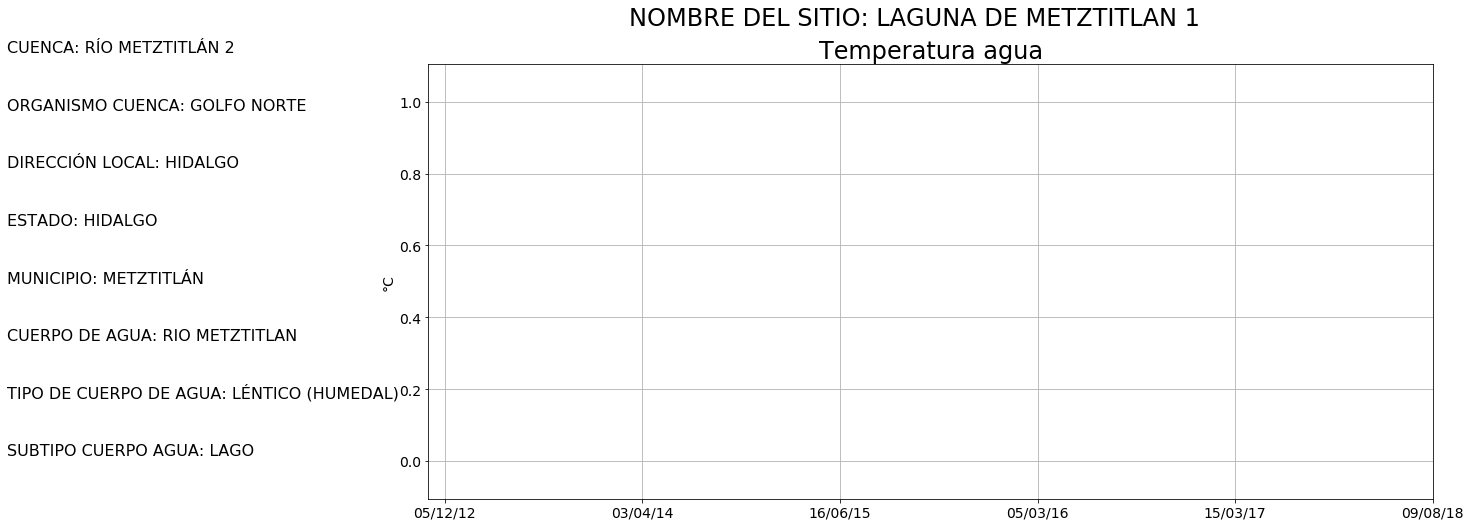

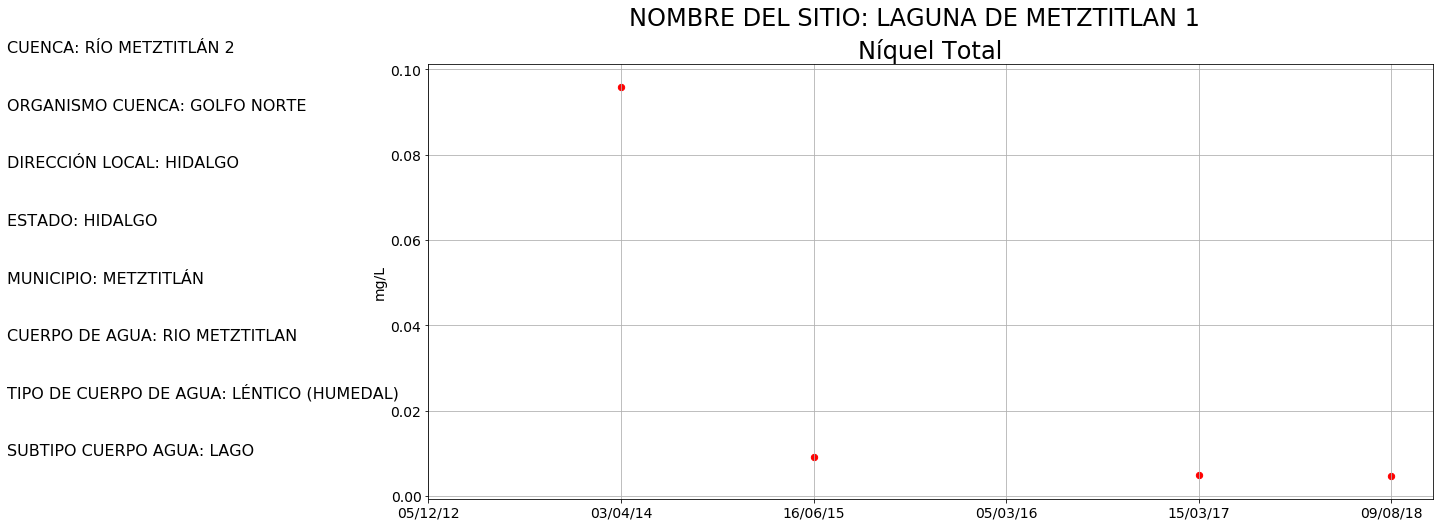

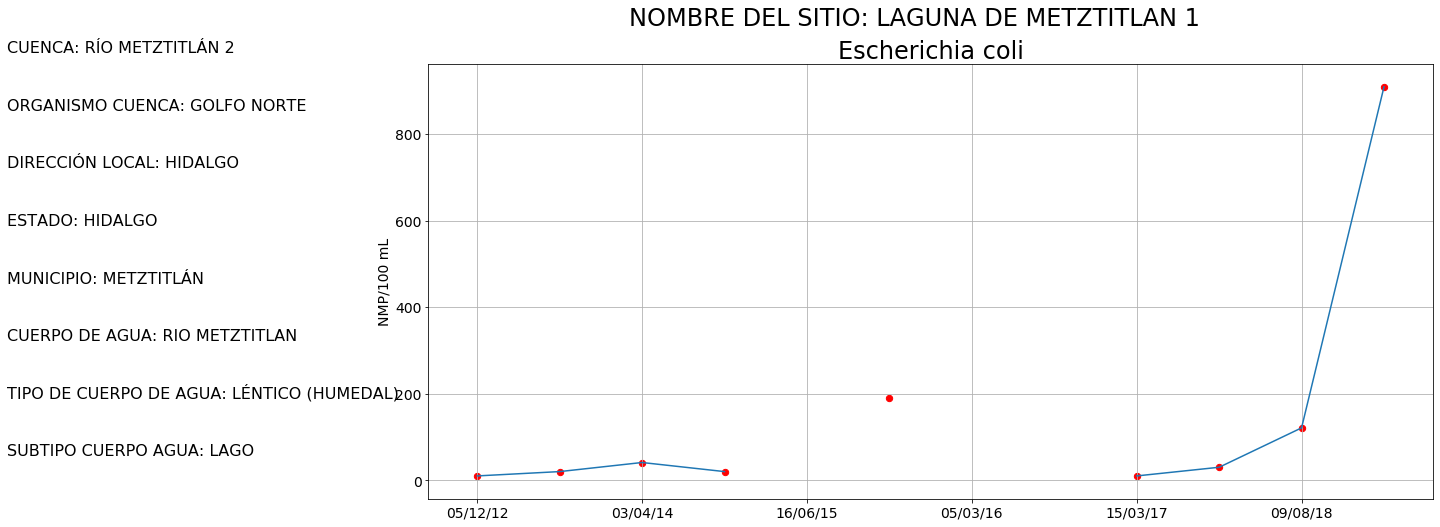

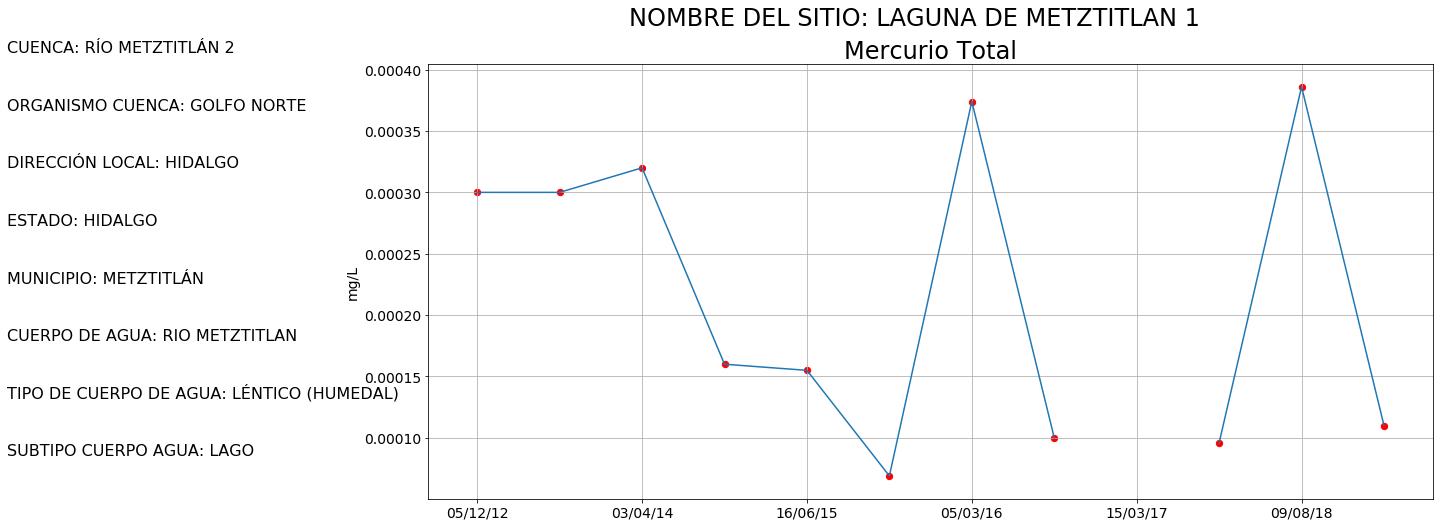

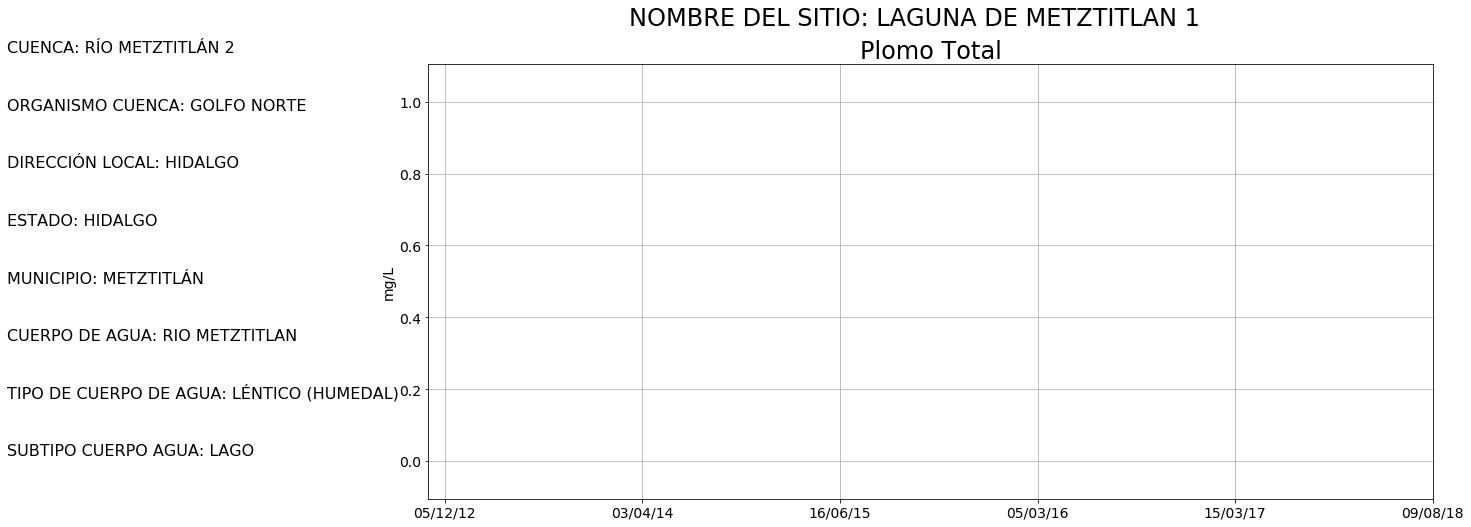

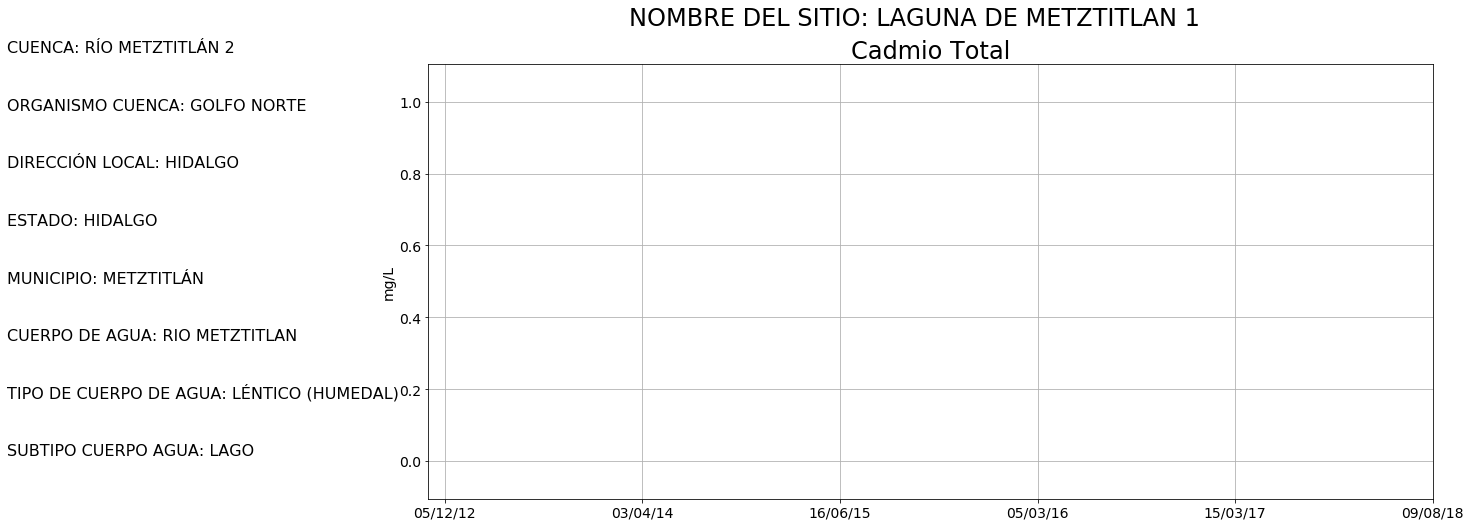

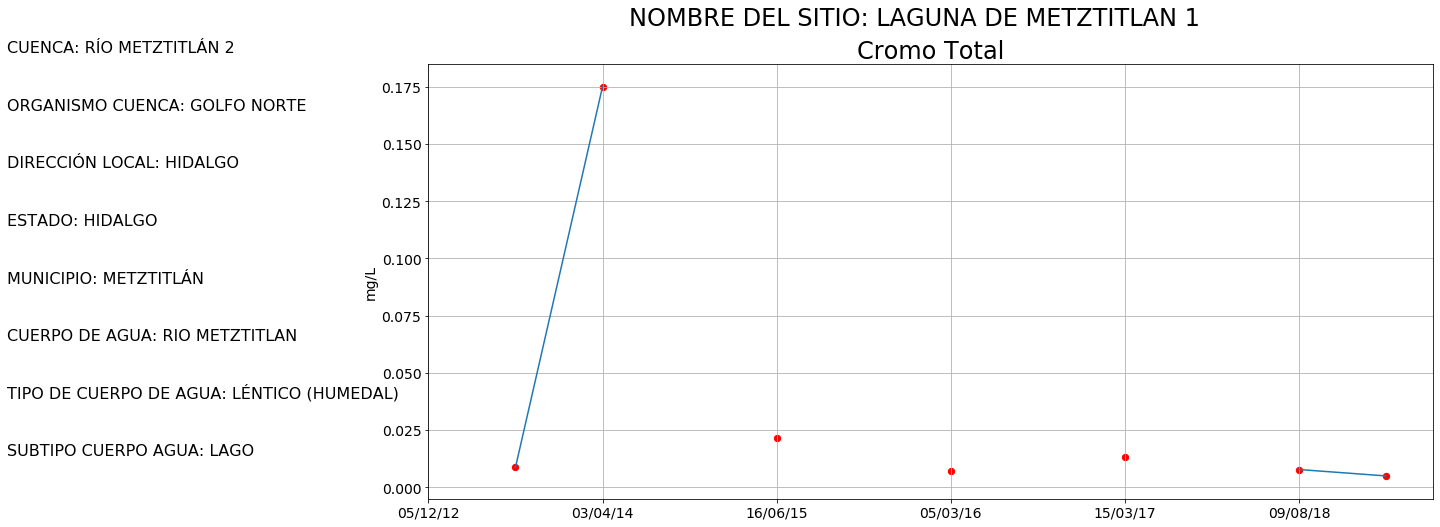

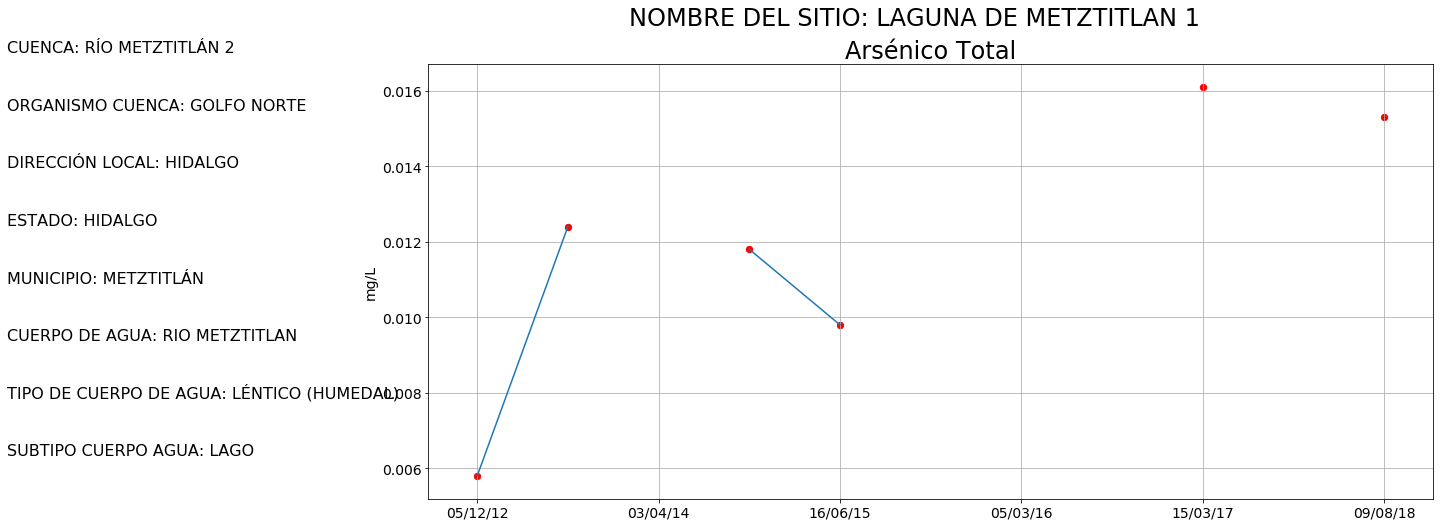

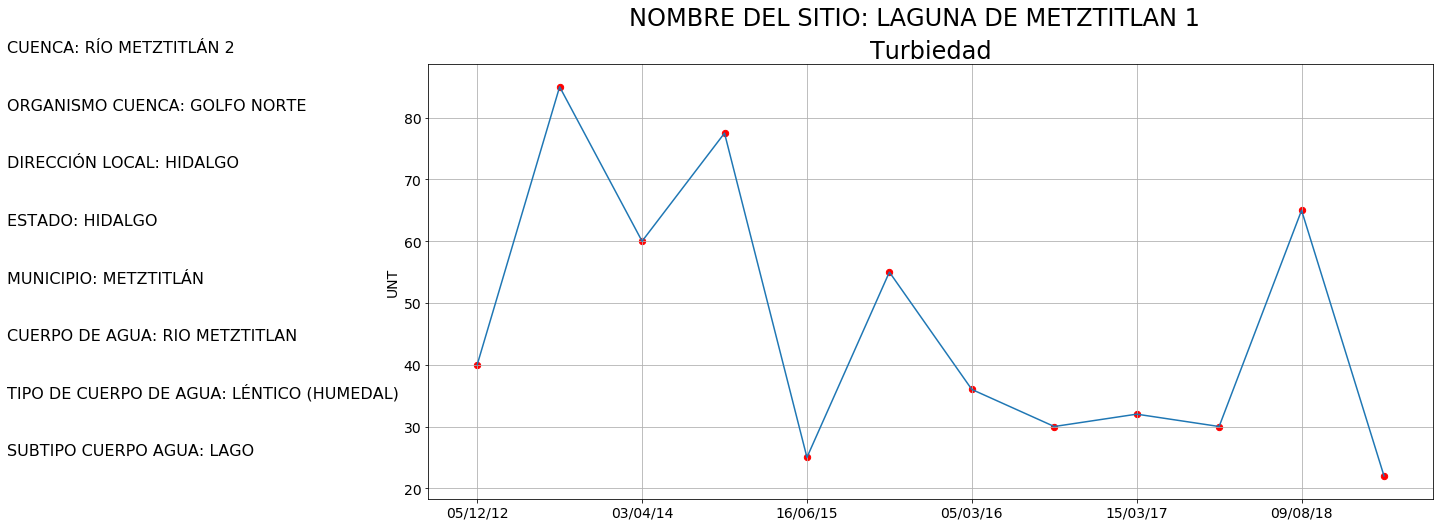

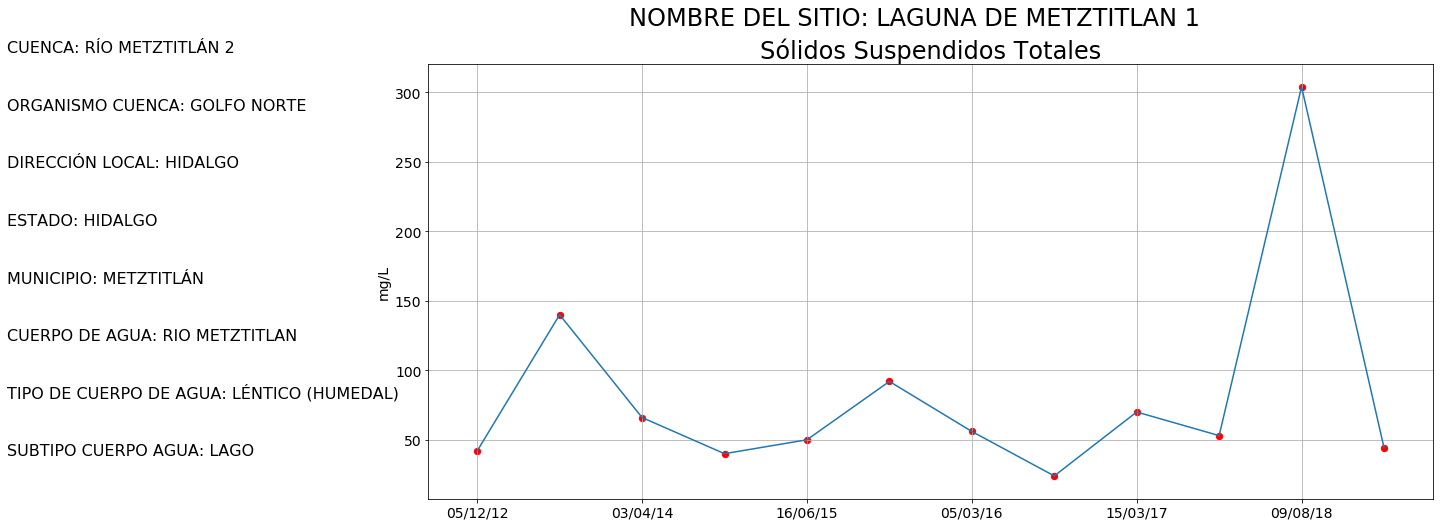

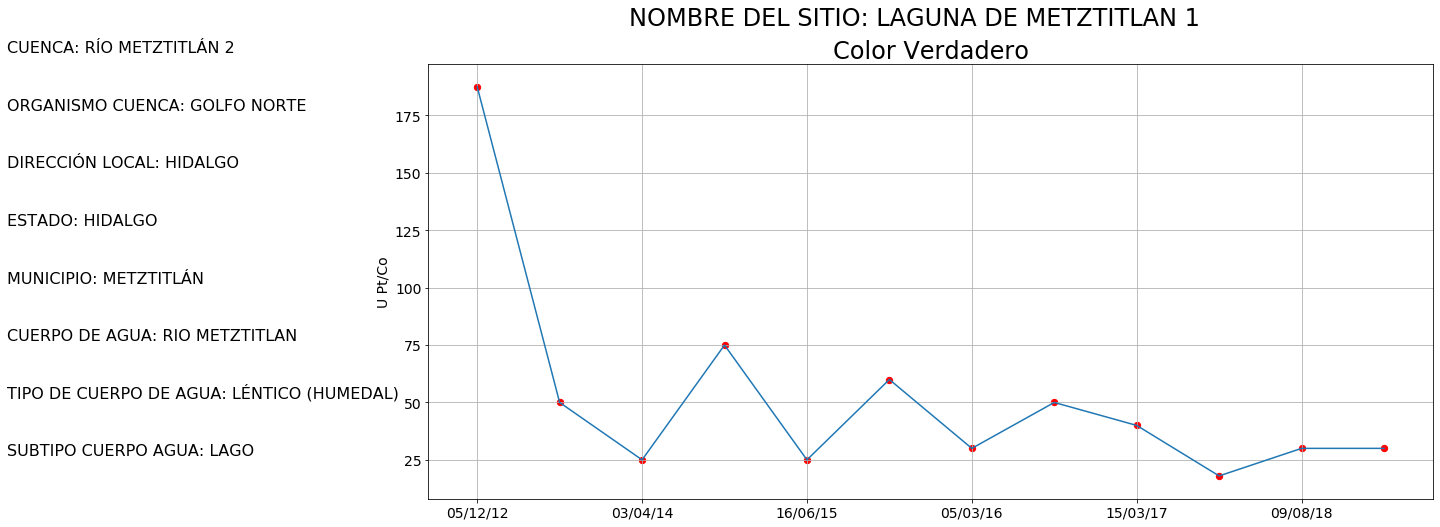

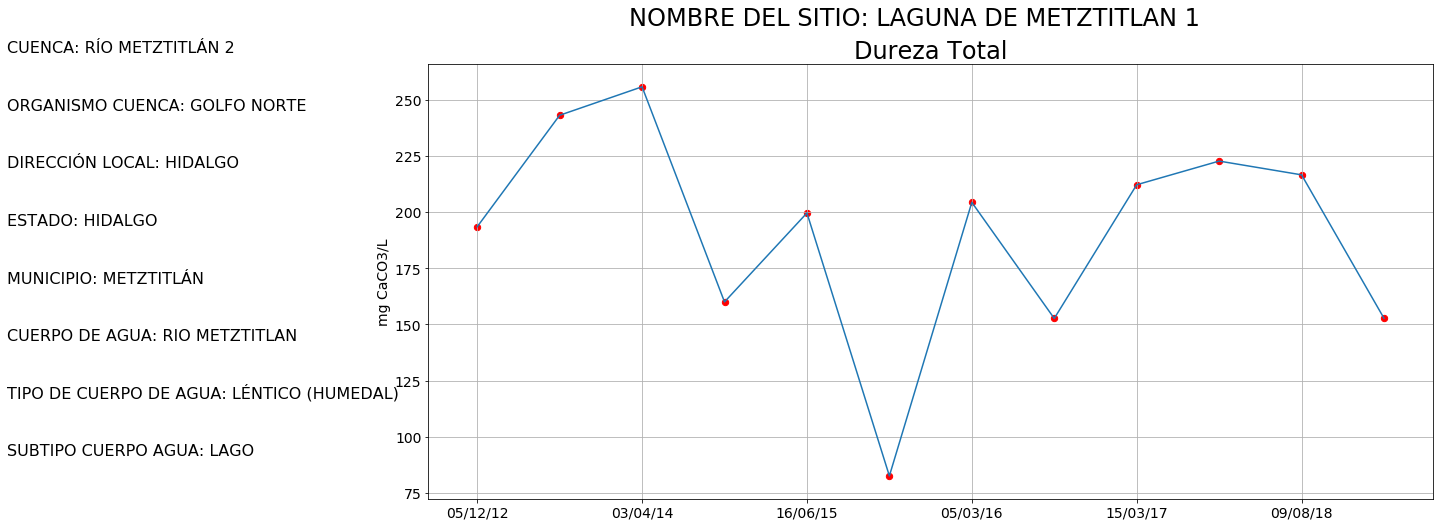

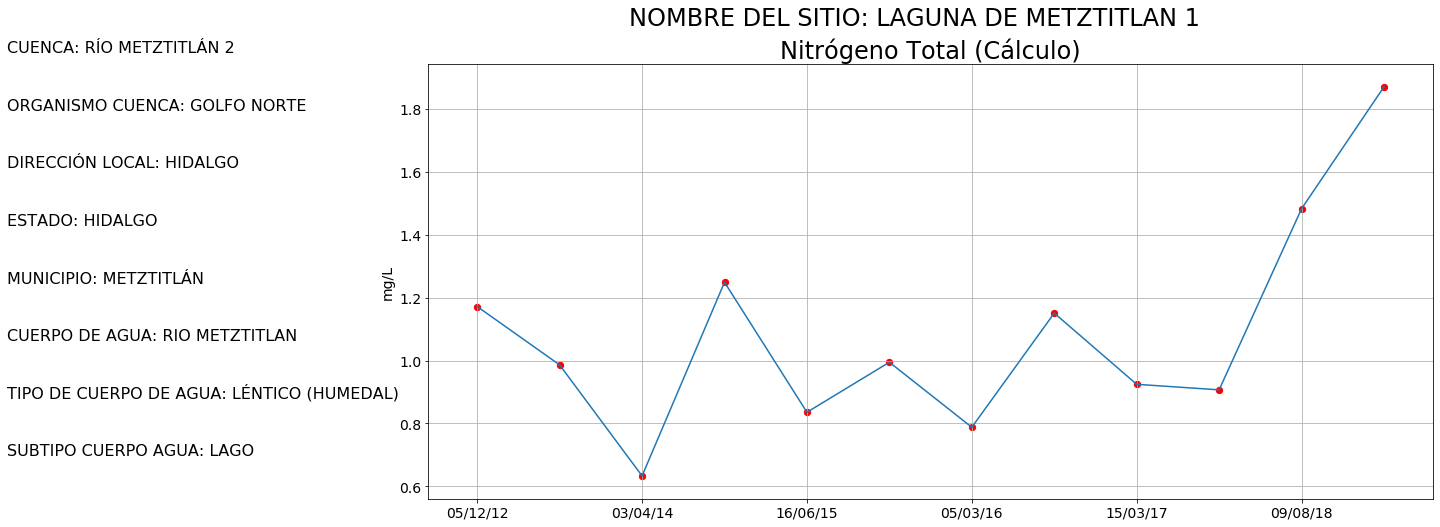

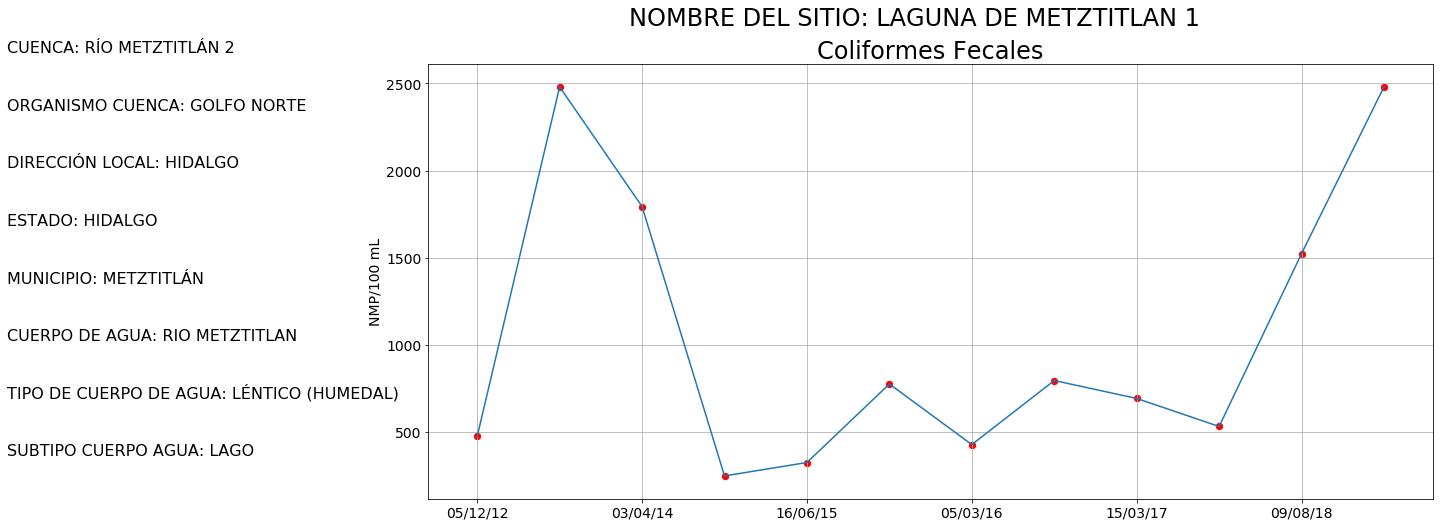

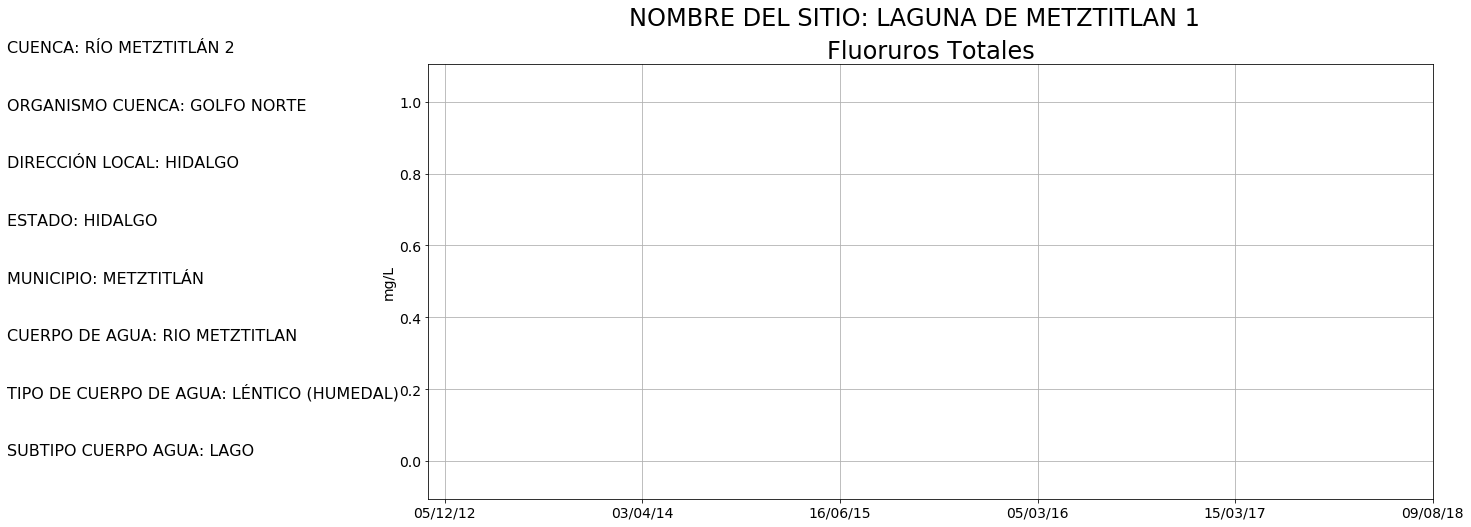

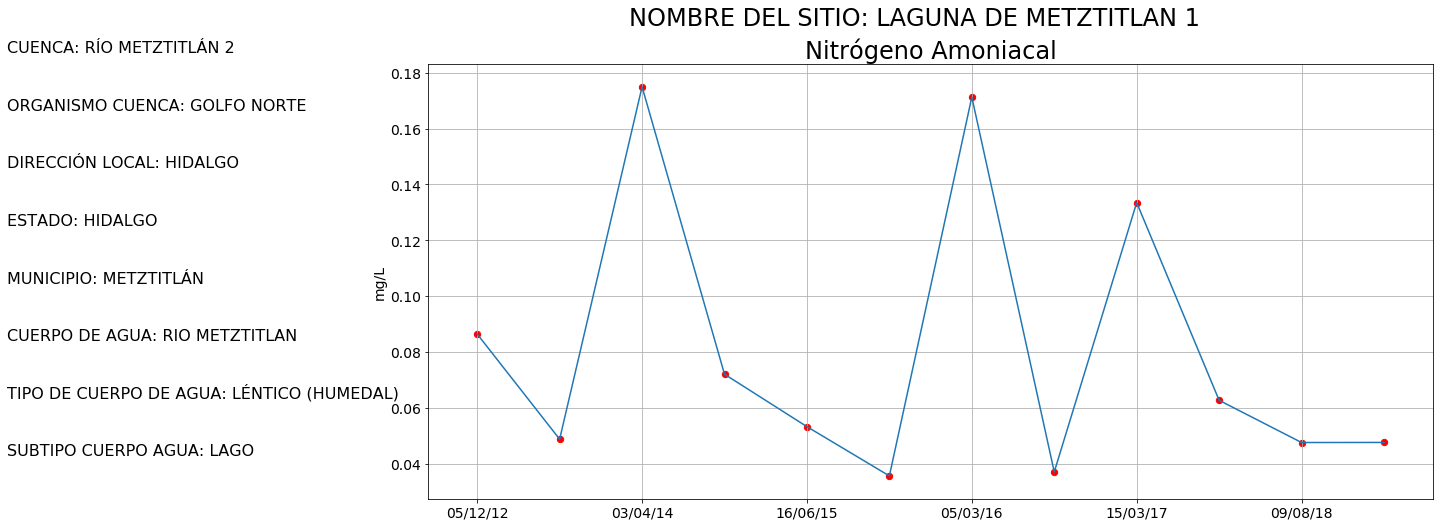

In [100]:
cols = ['SAAM','OD_mg/L','COLI_TOT','pH_CAMPO','TEMP_AGUA','NI_TOT','E_COLI','HG_TOT','PB_TOT',
        'CD_TOT','CR_TOT','AS_TOT','TURBIEDAD','SST','COLOR_VER','DUR_TOT','N_TOT','COLI_FEC',
        'FLUORUROS_TOT','N_NH3'] # No hay en la "hoja_etiquetas" fosfóro total, nitratos, nitritos. 


for i in range (0,3):#index of sitios
    df_Metztitlan = df_sit[df_sit["CUERPO DE AGUA"].str.contains("METZTITLAN")]
    nombre_sitio = df_Metztitlan["NOMBRE DEL SITIO"].array[i]
    index_namecols = df_Metztitlan.iloc[:,:]
    subtitulo = index_namecols.columns[1]+': '+nombre_sitio
    subtitulo_2 = index_namecols.columns[2]+': '+index_namecols.iloc[0+i,2]
    subtitulo_5 = index_namecols.columns[5]+': '+index_namecols.iloc[0+i,5]
    subtitulo_6 = index_namecols.columns[6]+': '+index_namecols.iloc[0+i,6]
    subtitulo_7 = index_namecols.columns[7]+': '+index_namecols.iloc[0+i,7]
    subtitulo_8 = index_namecols.columns[8]+': '+index_namecols.iloc[0+i,8]
    subtitulo_9 = index_namecols.columns[9]+': '+index_namecols.iloc[0+i,9]
    subtitulo_10 = index_namecols.columns[10]+': '+index_namecols.iloc[0+i,10]
    subtitulo_11 = index_namecols.columns[11]+': '+index_namecols.iloc[0+i,11]
    
    
    for j in range(len(cols)):#index of cols variable
    #for j in range(0,2):
        df_rows = df_eti[df_eti['CLAVE PARÁMETRO'] == cols[j]]
        titulo = df_rows['NOMBRE DEL PARÁMETRO']
        titulo = df_rows.iloc[0,1]
        
        
        df_res[cols[j]] = pd.to_numeric(df_res[cols[j]], downcast="float",errors='coerce')
        df_cuerpo_de_agua = df_sit[df_sit["CUERPO DE AGUA"].str.contains("METZTITLAN")]        

        key_array_df = df_cuerpo_de_agua["CLAVE SITIO"].array[i]
        serie = df_res[df_res["CLAVE SITIO"].str.contains(key_array_df)]
        serie[cols[j]].replace('\< | \>', '')
        serie[cols[j]].dropna()        

        rcParams['figure.figsize'] = 18, 8
        plt.figure()
        plt.title(titulo, fontsize=24)
        plt.suptitle(subtitulo, fontsize=24)
        
        #plt.figtext(0.5, 0.01, "one text and next text", ha="center", fontsize=18)#, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
        plt.figtext(-0.2, 0.9, subtitulo_2, ha="left", fontsize=16)#, bbox={"facecolor":"blue", "alpha":0.1, "pad":})
        plt.figtext(-0.2, 0.8, subtitulo_5, ha="left", fontsize=16)
        plt.figtext(-0.2, 0.7, subtitulo_6, ha="left", fontsize=16)
        plt.figtext(-0.2, 0.6, subtitulo_7, ha="left", fontsize=16)
        plt.figtext(-0.2, 0.5, subtitulo_8, ha="left", fontsize=16)
        plt.figtext(-0.2, 0.4, subtitulo_9, ha="left", fontsize=16)
        plt.figtext(-0.2, 0.3, subtitulo_10, ha="left", fontsize=16)
        plt.figtext(-0.2, 0.2, subtitulo_11, ha="left", fontsize=16)#, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
     
        plt.plot(serie['FECHA'], serie[cols[j]])
        plt.scatter(serie['FECHA'], serie[cols[j]], marker='o',color='red', s=40)
        plt.xticks(np.arange(0, serie.shape[0], step=serie.shape[0]/6), fontsize=14) #Numberlines, nnumberlines/6
        plt.yticks(fontsize=14)
        plt.ylabel(df_rows.iloc[0,2], fontsize=14)
        plt.grid()    